# Exploration des données fournies par l'ARPE

## Chargement des données, des librairies et des variables globales

In [1]:
import warnings

import pandas as pd
import plotnine as p9

warnings.filterwarnings("ignore")

In [2]:
saving_graphs = False
racine = "../graphes/exploration_"

In [3]:
df_vtc = pd.read_csv("../data/data_vtc_2023.csv")
df_livr = pd.read_csv("../data/data_livraison_2023.csv")

In [4]:
df_vtc["Année"] = df_vtc["Année"].astype(str)
df_livr["Année"] = df_livr["Année"].astype(str)
df_vtc.replace(to_replace="2021", value="2021 (trimestre 4)", inplace=True)
df_livr.replace(to_replace="2021", value="2021 (trimestre 4)", inplace=True)

In [5]:
periode_sort = ["toutes", "jour", "nuit", "semaine", "week-end"]
annee_sort = ["2023", "2022", "2021 (trimestre 4)"]
colors = ["#1C5588", "#00BDC8", "#7ACFB0", "#FBCE9E", "#F88F52"]
caption = (
    r"$\bf{Source}$"
    + " : d'après les données publiées par les plateformes\n"
    + r"$\bf{Collecte}$"
    + " "
    + r"$\bf{et}$"
    + " "
    + r"$\bf{compilation}$"
    + " : ARPE\n"
    + r"$\bf{Traitement}$"
    + " : PEReN"
)

## Exploration des indicateurs

### Exploration générique

In [6]:
# Exploration des valeurs uniques contenues dans chaque colonne
valeurs_variables = [
    [col, set(df_vtc[col]), set(df_livr[col])] for col in df_vtc.columns
]

pd.DataFrame(
    valeurs_variables,
    columns=[
        "Nom de la variable",
        "Valeurs prises pour les VTCs",
        "Valeurs prises pour les livraisons",
    ],
)

Nom de la variable                       Valeurs prises pour les VTCs  \
0            Durée étudiée                        {semaine, mois, prestation}   
1  Activité du travailleur  {76-120, 11-25, 1-150, >120, 31-75, toutes, 15...   
2       Période d'activité            {nuit, jour, toutes, week-end, semaine}   
3                 Variable  {duree, pourcentage, attente-proposition, reve...   
4               Plateforme  {FREENOW, MARCEL, BOLT, CAO CAO, HEETCH, BLACK...   
5                    Année                   {2021 (trimestre 4), 2022, 2023}   
6                   Valeur  {0.5, 0.25, 4.75, 4.0, 6.0, 7.5, 6.5, 8.7, 10....   

                  Valeurs prises pour les livraisons  
0                        {semaine, mois, prestation}  
1  {76-120, 11-25, >120, 31-75, toutes, 3-30, 26-...  
2     {repas, nuit, jour, toutes, week-end, semaine}  
3               {attente-proposition, duree, revenu}  
4           {DELIVEROO, UBER EATS, STUART, DELICITY}  
5                   {2021 (trimestre 4), 2022, 2023}  
6  {3.2, 4.63, 5.98, 6.08, 6.09, 6.04, 9.34, 10.7...

In [7]:
# Par la suite, on supprime :
# - les données sur les repas, dont les données sont très lacunaires
# - les données des variables non-exigées par le décret

df_vtc = df_vtc[
    (df_vtc["Variable"] != "pourcentage")
    & (df_vtc["Variable"] != "attente-prestation")
    & (df_vtc["Variable"] != "distance")
    & (df_vtc["Variable"] != "part-bonus")
    & (df_vtc["Activité du travailleur"] != "1-150")
    & (df_vtc["Activité du travailleur"] != "150-300")
]

df_livr = df_livr[
    (df_livr["Variable"] != "pourcentage")
    & (df_livr["Variable"] != "attente-prestation")
    & (df_livr["Période d'activité"] != "repas")
]

### Distribution des valeurs manquantes

In [8]:
tab10_palette = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
]

viridis3_palette = [
    "#5ec962",
    "#21918c",
    "#3b528b",
]

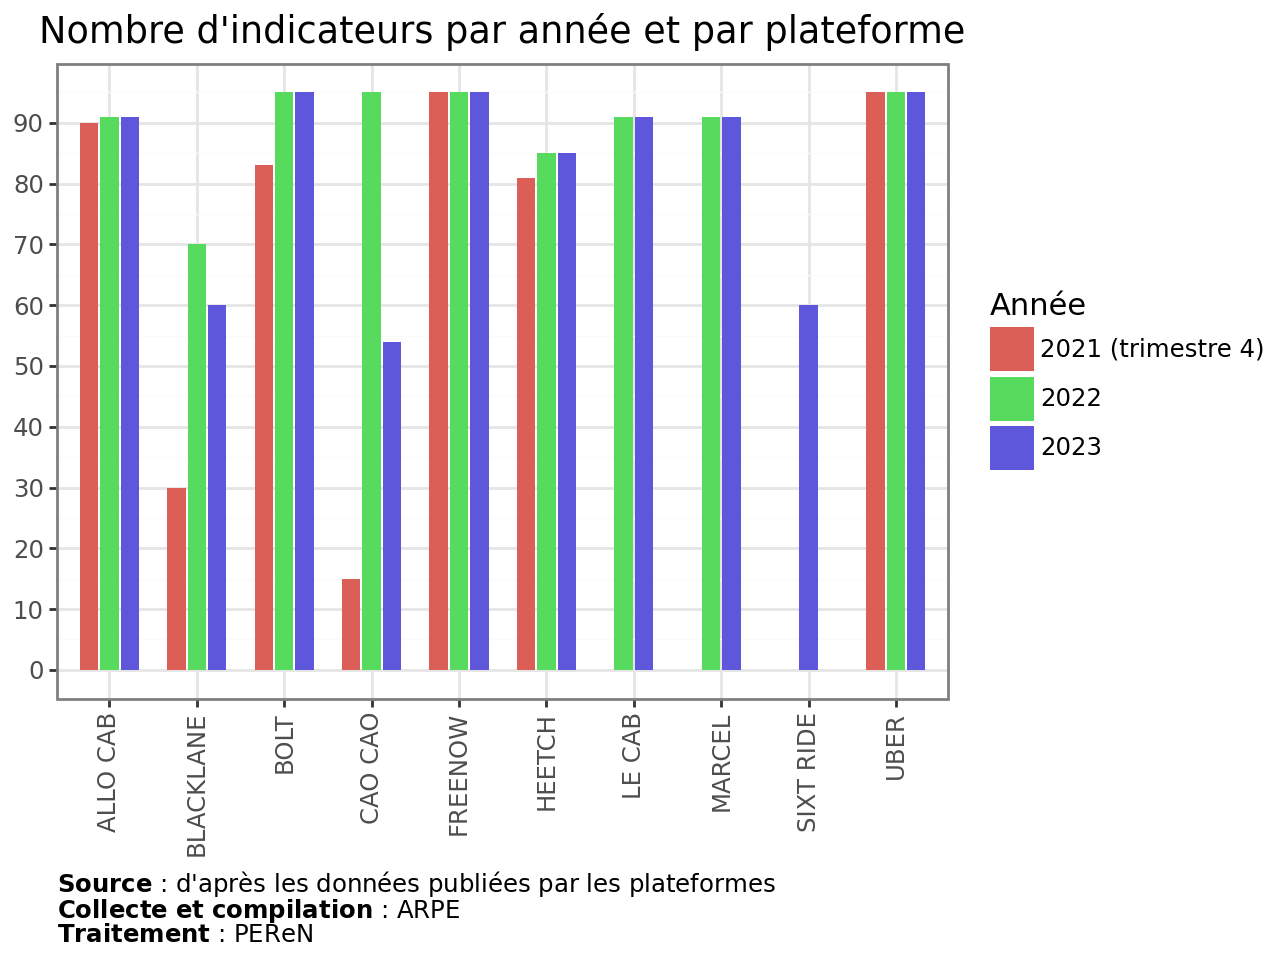

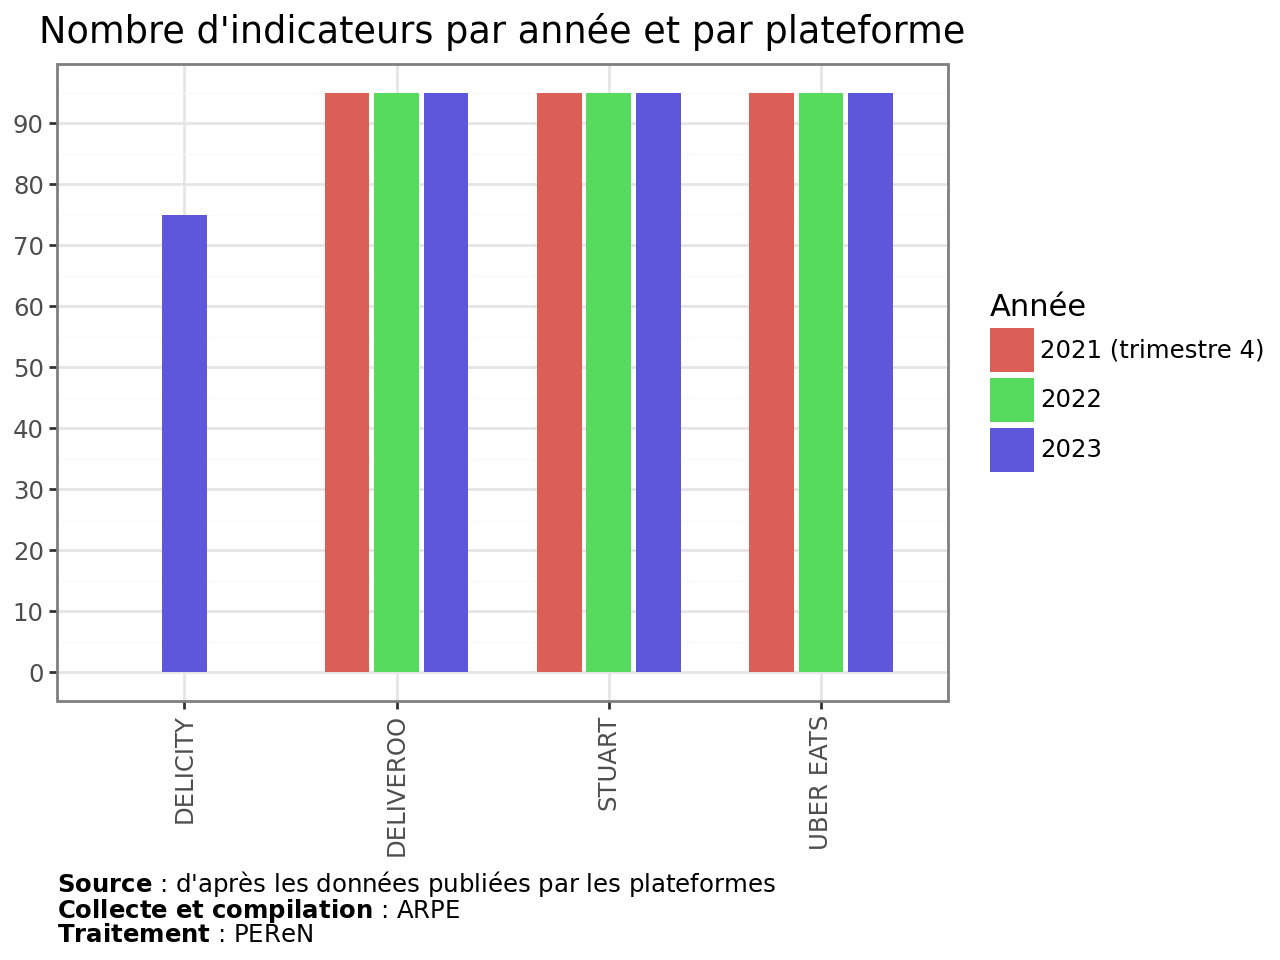

In [9]:
def valeurs_manquantes_plateforme(df, title=""):
    # Fonction de création de graphes comptant les indicateurs présents

    # Suppression des variables non exigées par le décret
    # Suppression de toutes les lignes ne contenant aucune valeur
    sub_df = df[
        (df["Variable"] != "pourcentage") & (df["Variable"] != "attente-prestation")
    ].dropna(how="any")

    # Création du graphe
    graph = (
        p9.ggplot(sub_df)
        + p9.aes(x="Plateforme", fill="Année", pattern="Plateforme")
        + p9.geom_bar(position=p9.position_dodge2(preserve="single"), width=0.7)
        + p9.labs(
            title=title,
            x="",
            y="",
            caption=caption,
        )
        + p9.theme_bw()
        + p9.theme(
            plot_caption=p9.element_text(hjust=0),
            axis_text_x=p9.element_text(angle=90, hjust=0.5),
        )
        + p9.scale_y_continuous(breaks=[10 * i for i in range(200)])
        # + p9.scale_fill_manual(values=viridis3_palette)
        # + p9.scale_fill_continuous()
    )
    return graph


# titre possible (mais non-utilisé dans la note produite) :
# "Nombre d'indicateurs par année et par plateforme"
if saving_graphs:
    valeurs_manquantes_plateforme(df_livr).save(
        racine + "nb_indicateurs_livr.png", dpi=200
    )
    valeurs_manquantes_plateforme(df_vtc).save(
        racine + "nb_indicateurs_vtc.png", dpi=200
    )
else:
    print(
        valeurs_manquantes_plateforme(
            df_vtc, title="Nombre d'indicateurs par année et par plateforme"
        )
    )
    print(
        valeurs_manquantes_plateforme(
            df_livr, title="Nombre d'indicateurs par année et par plateforme"
        )
    )

### Visualisation des données hebdomadaires et mensuelles

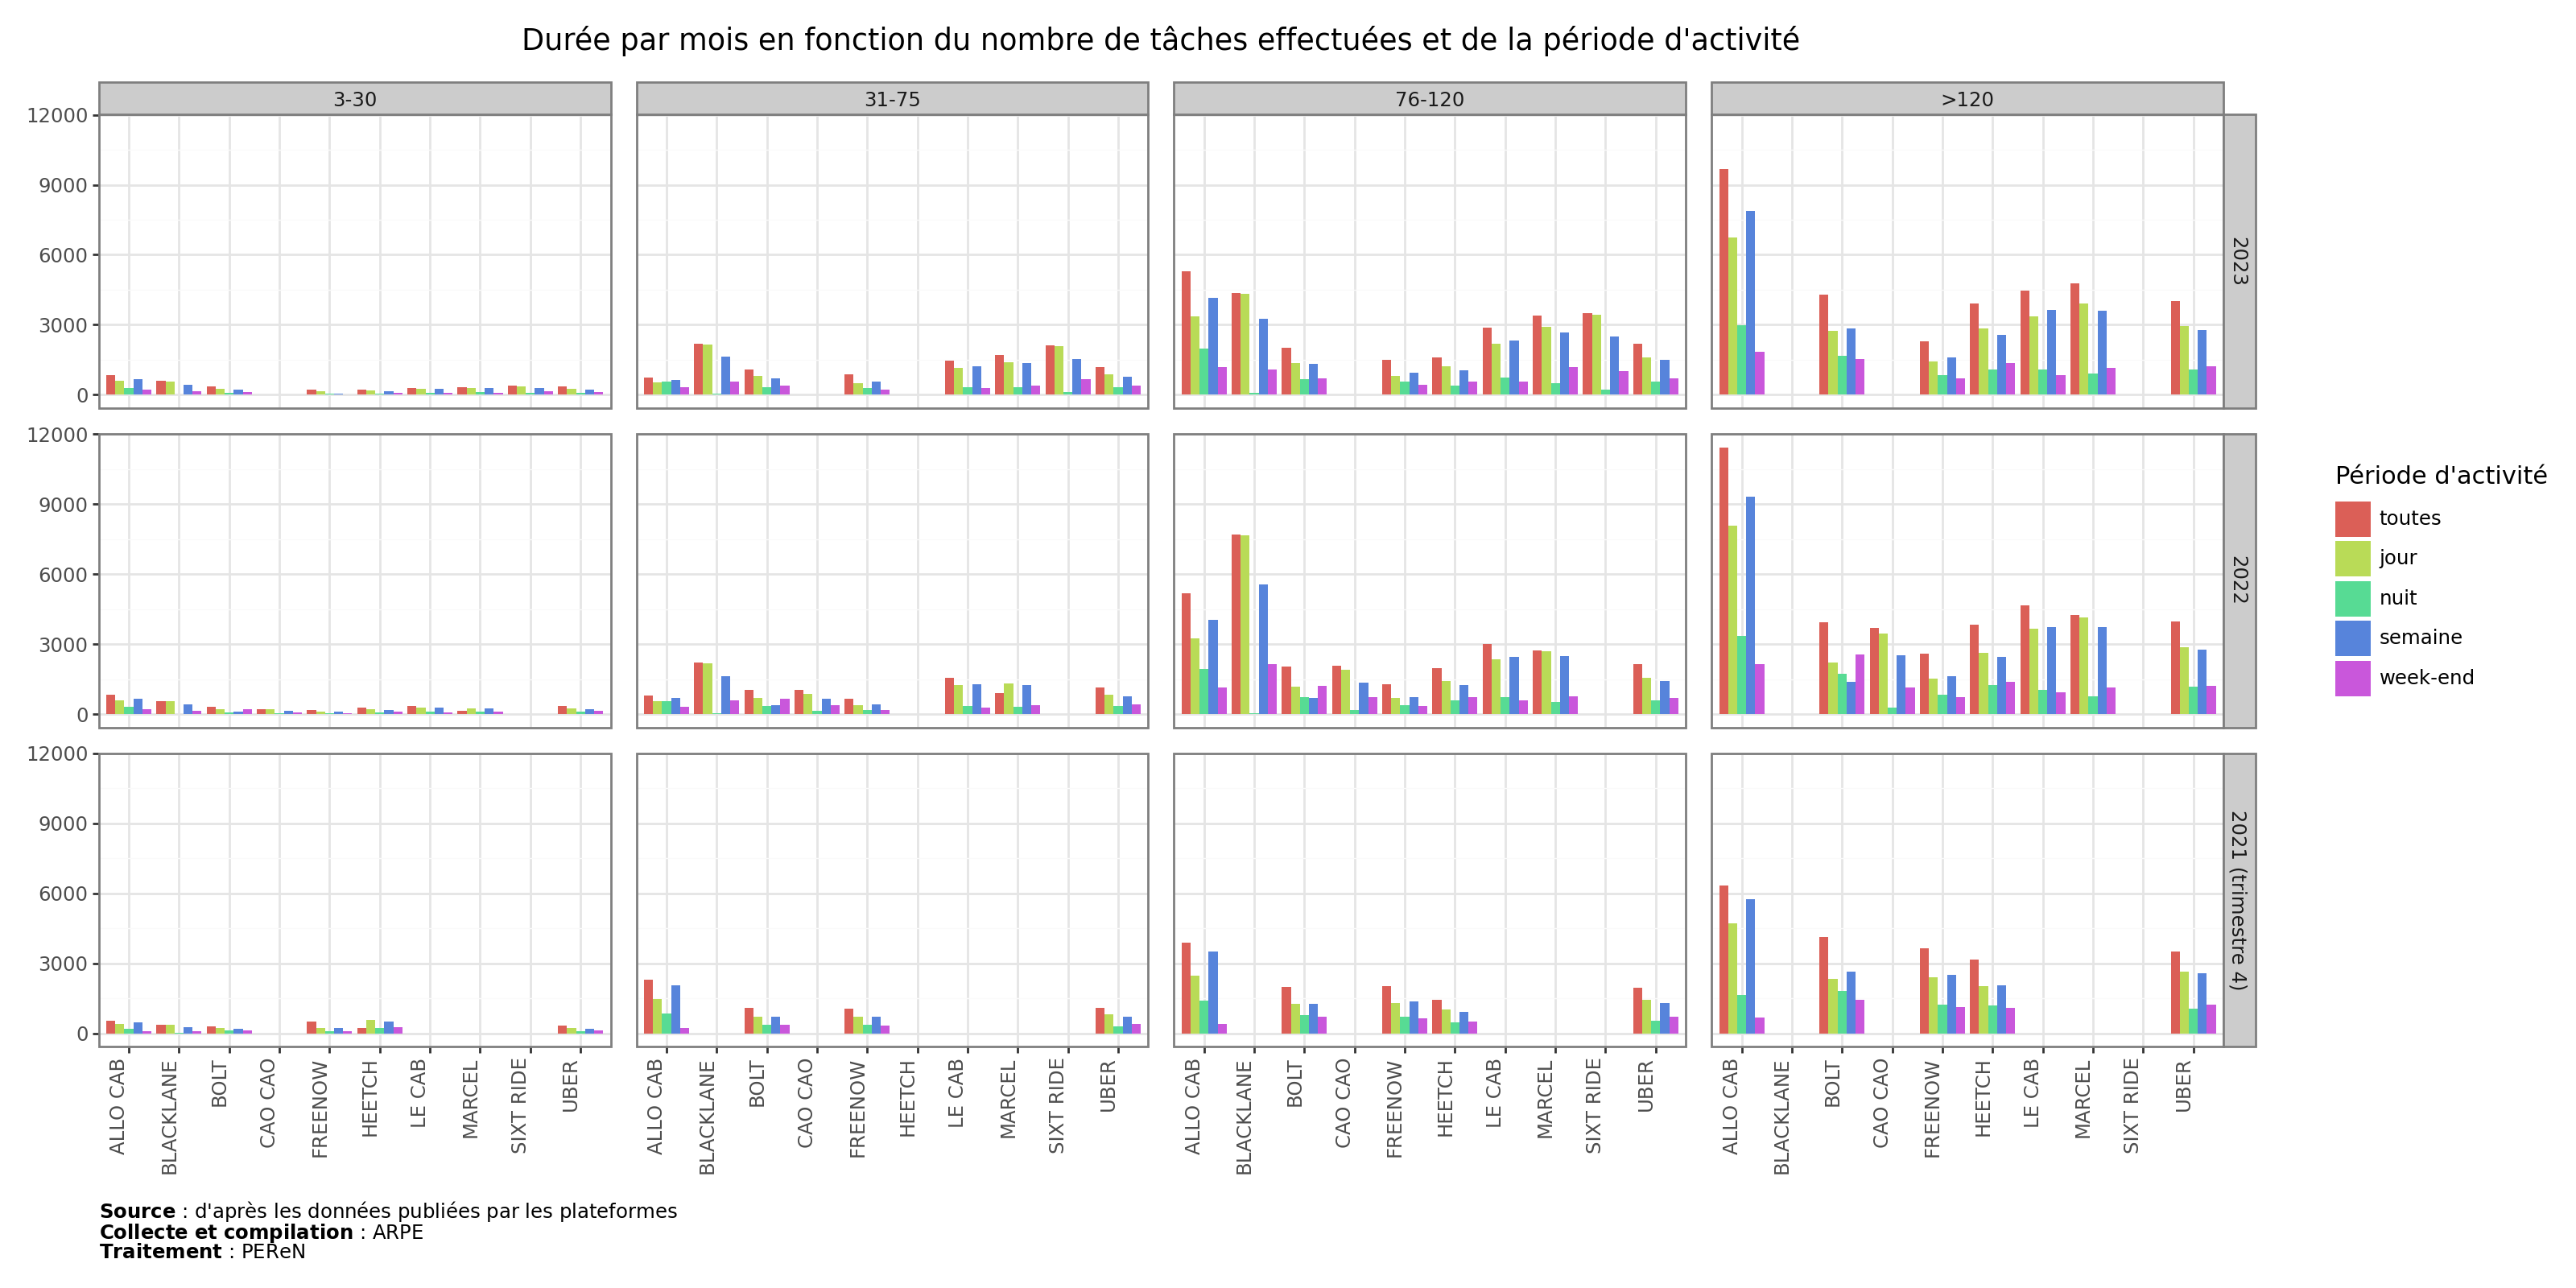

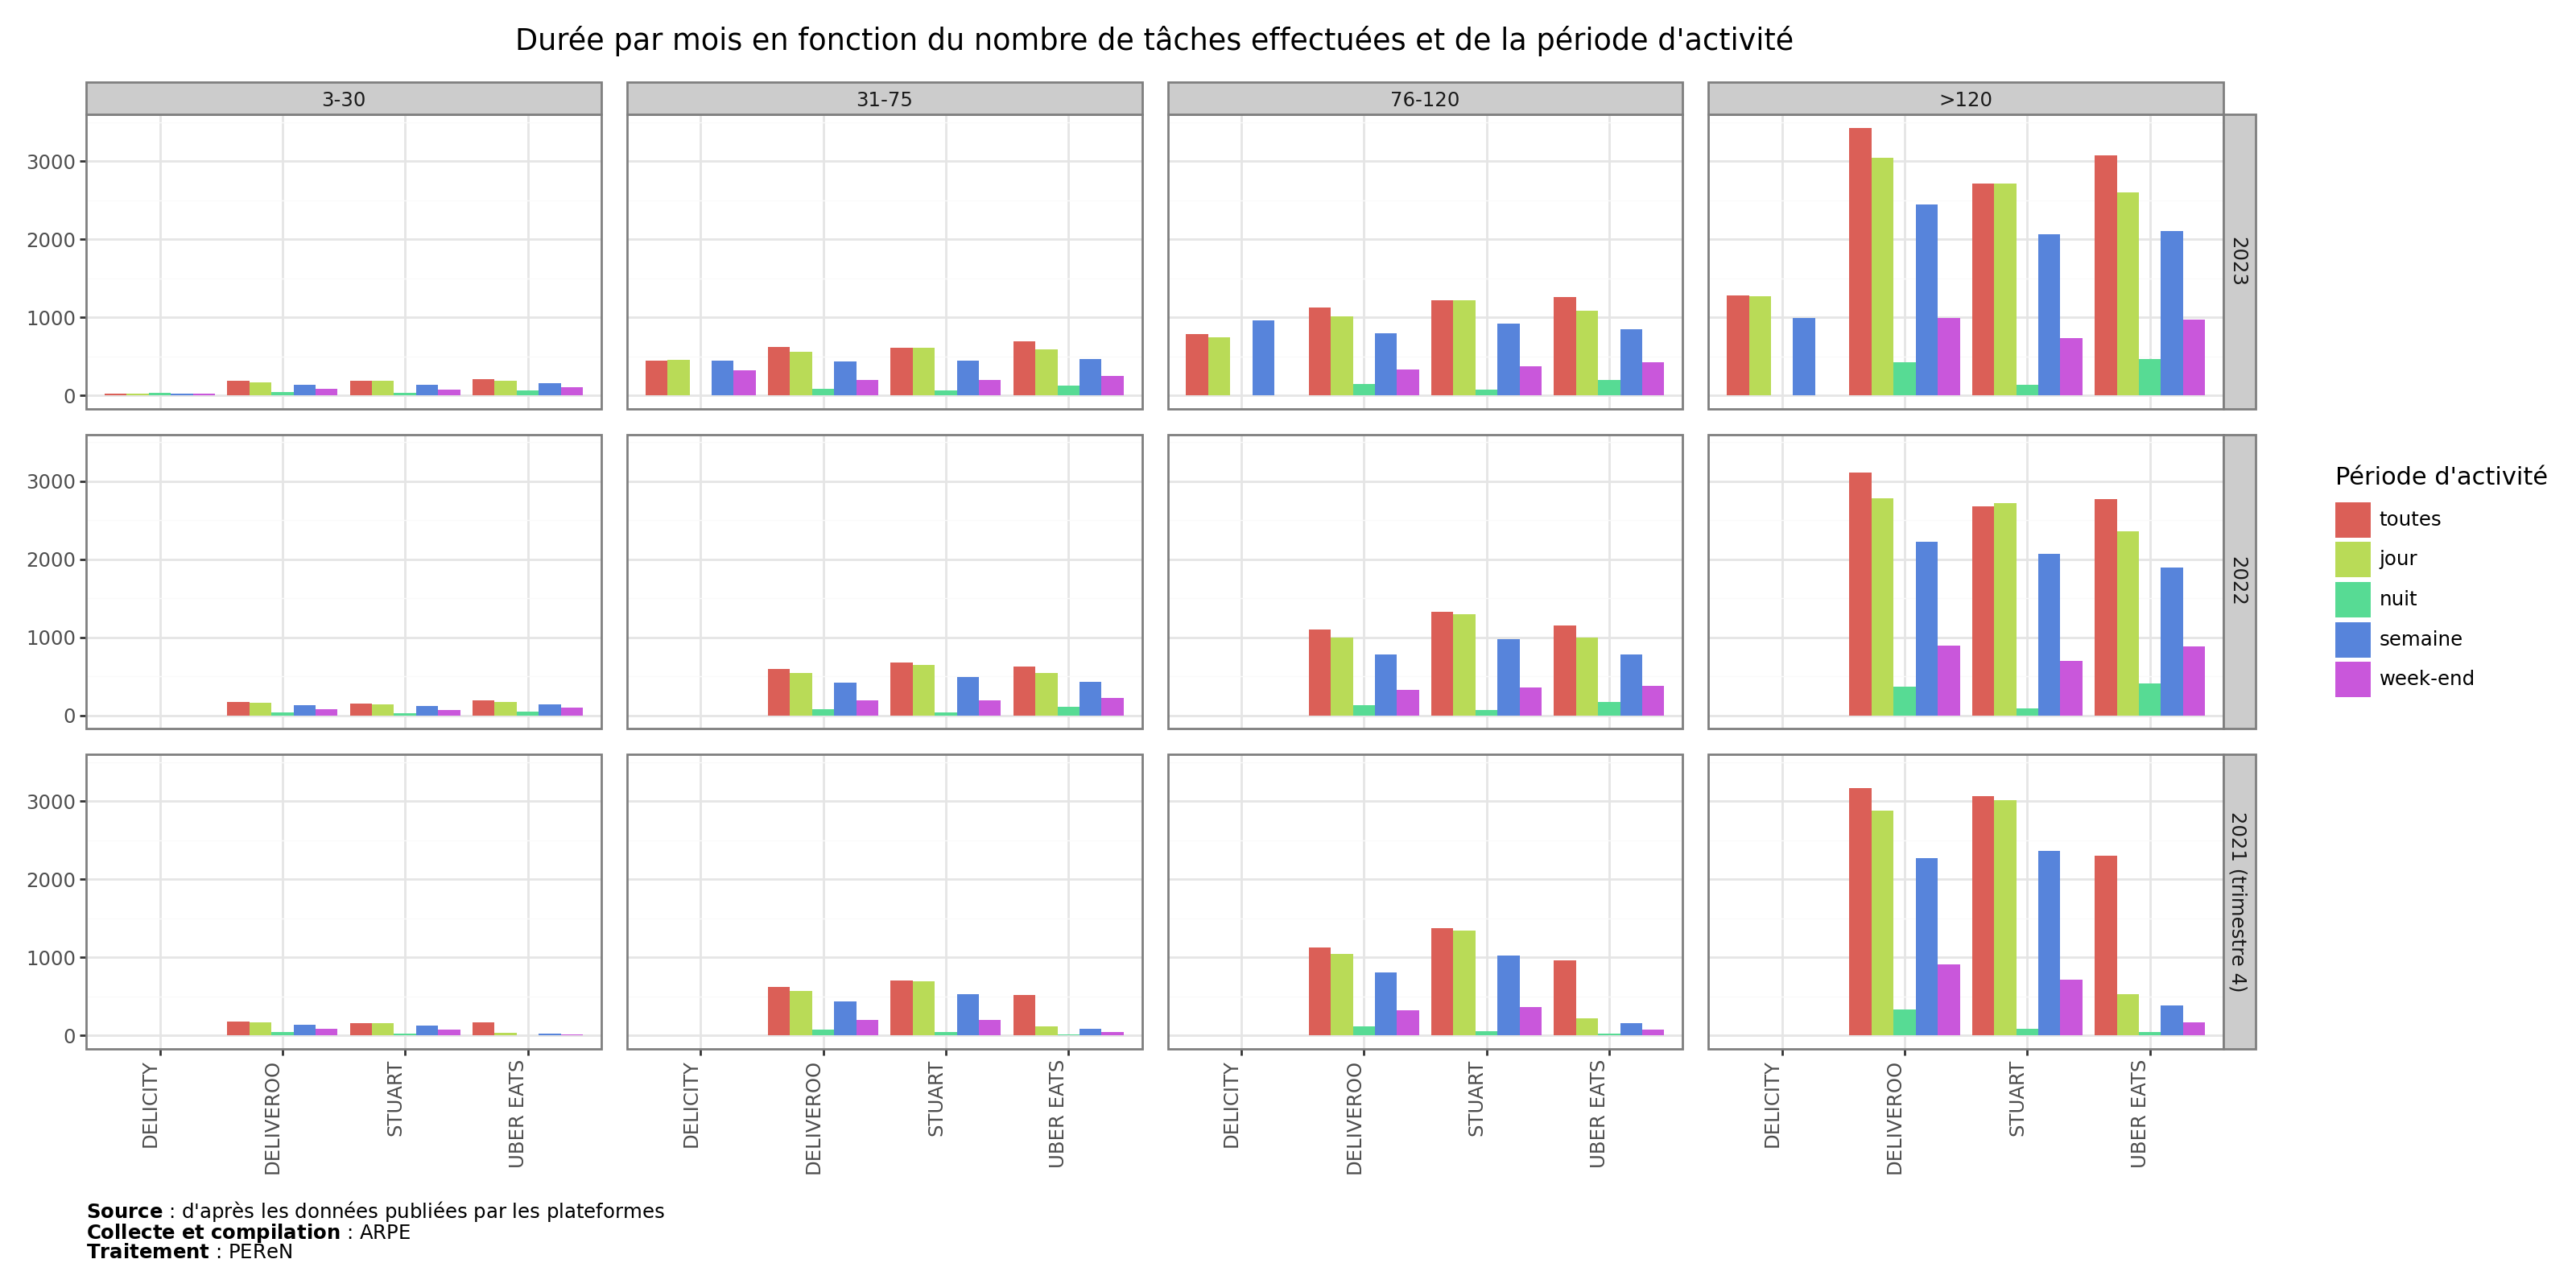

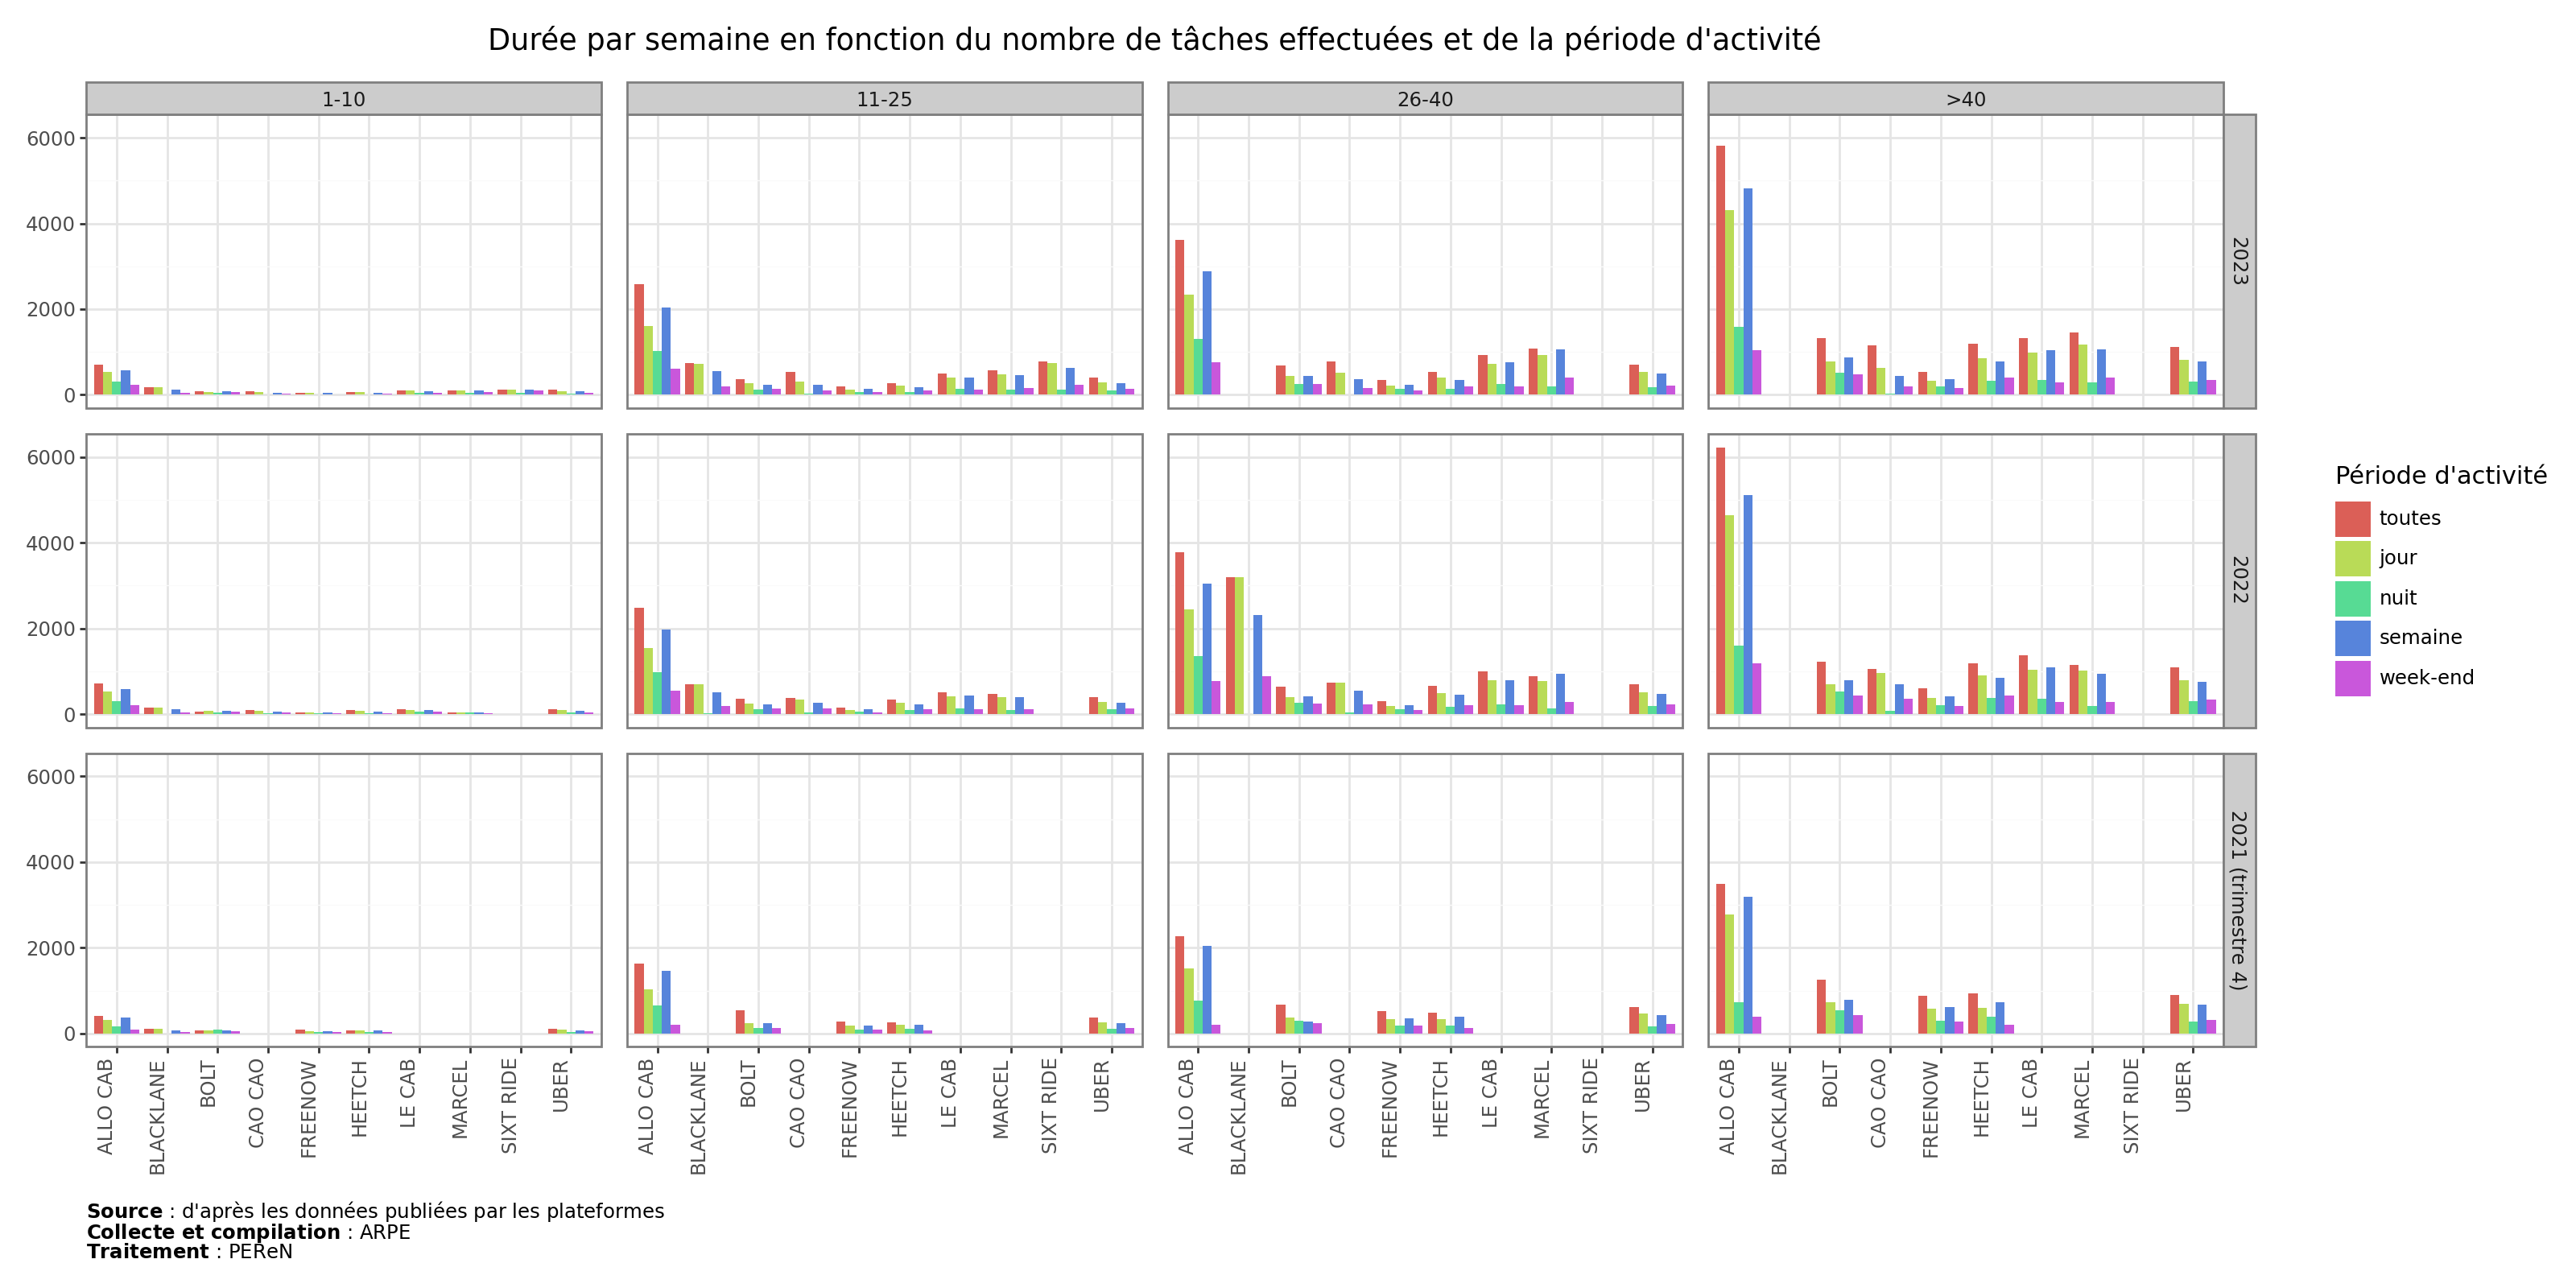

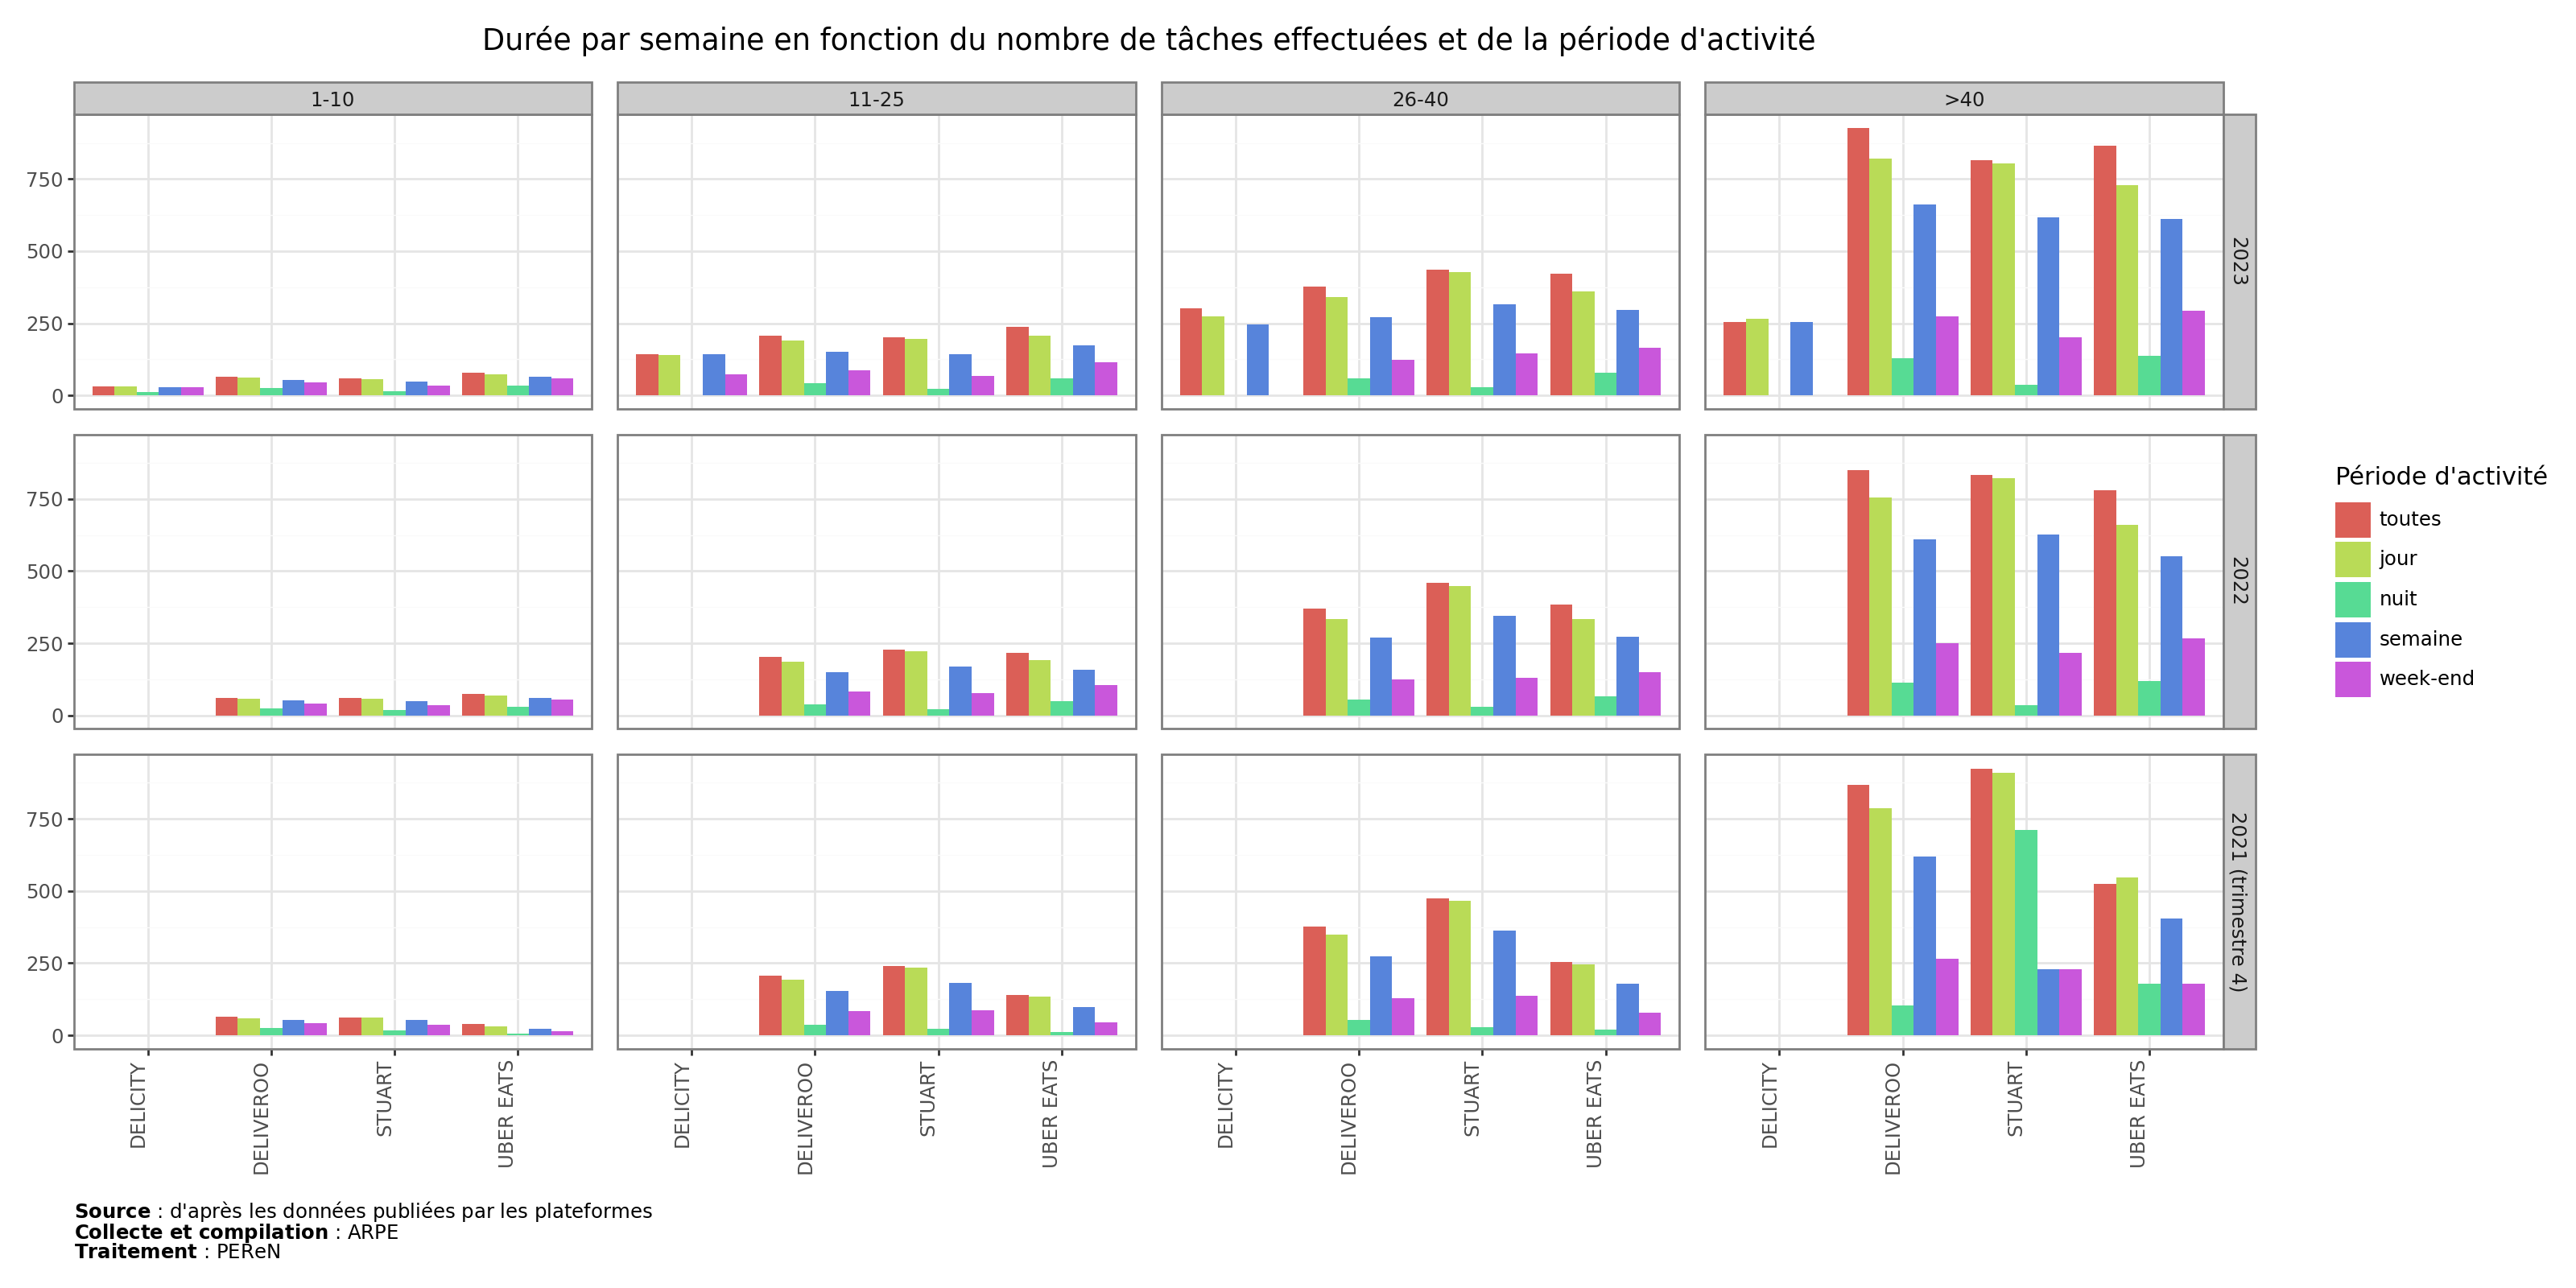

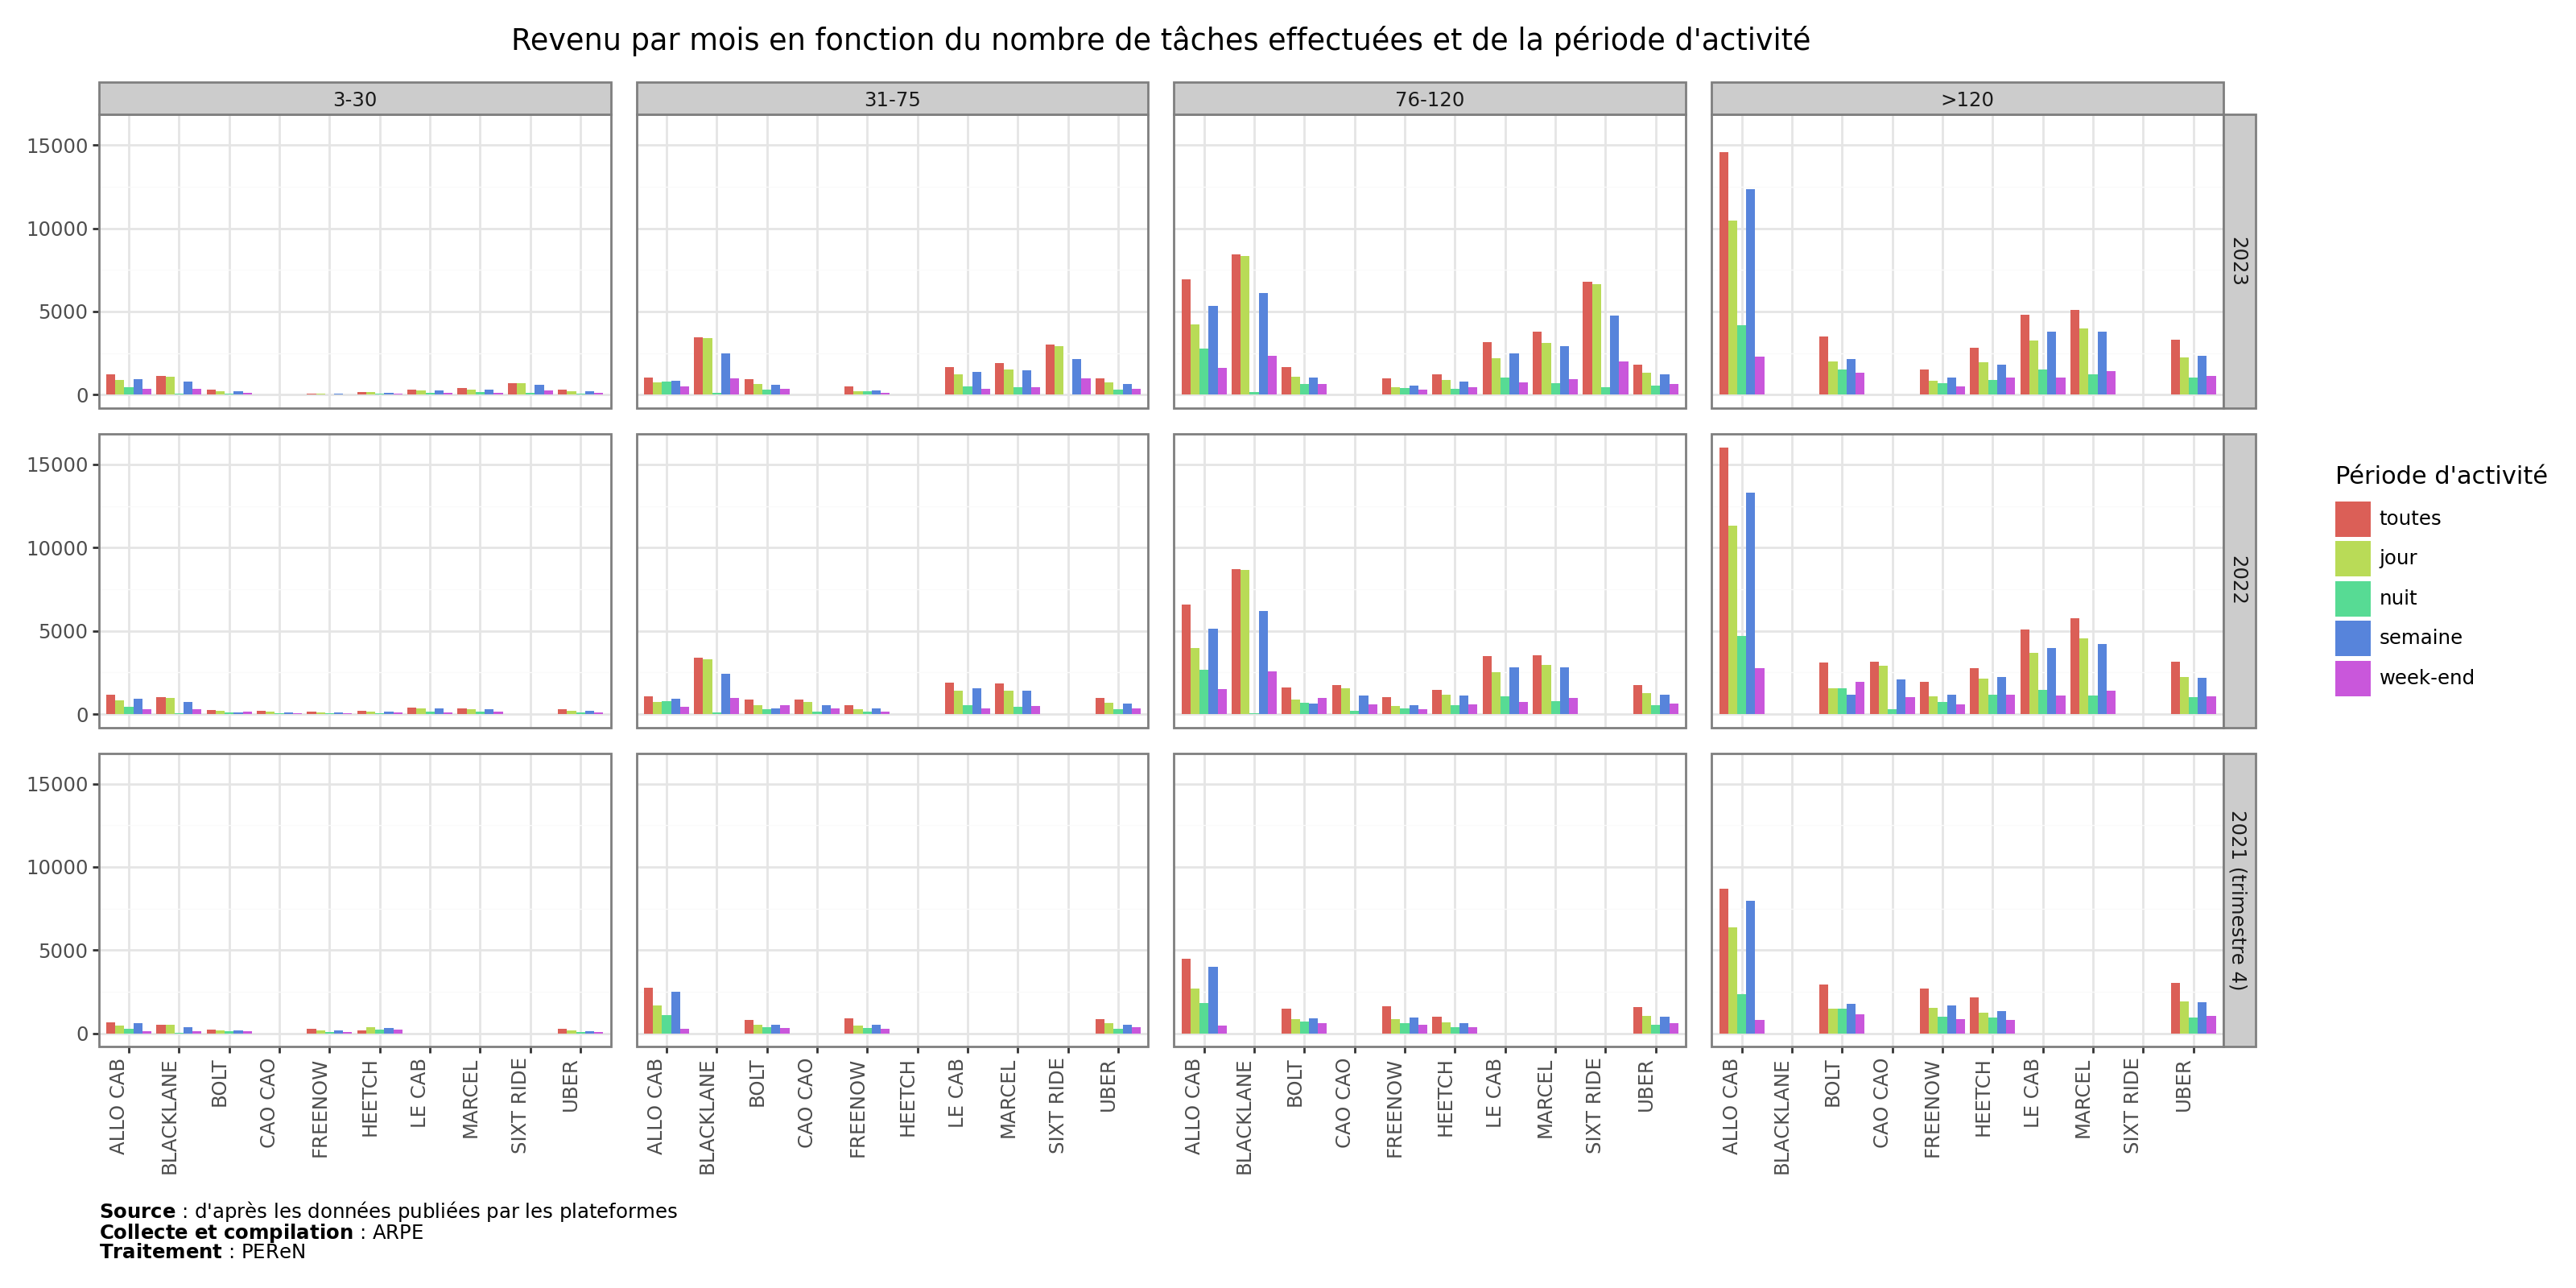

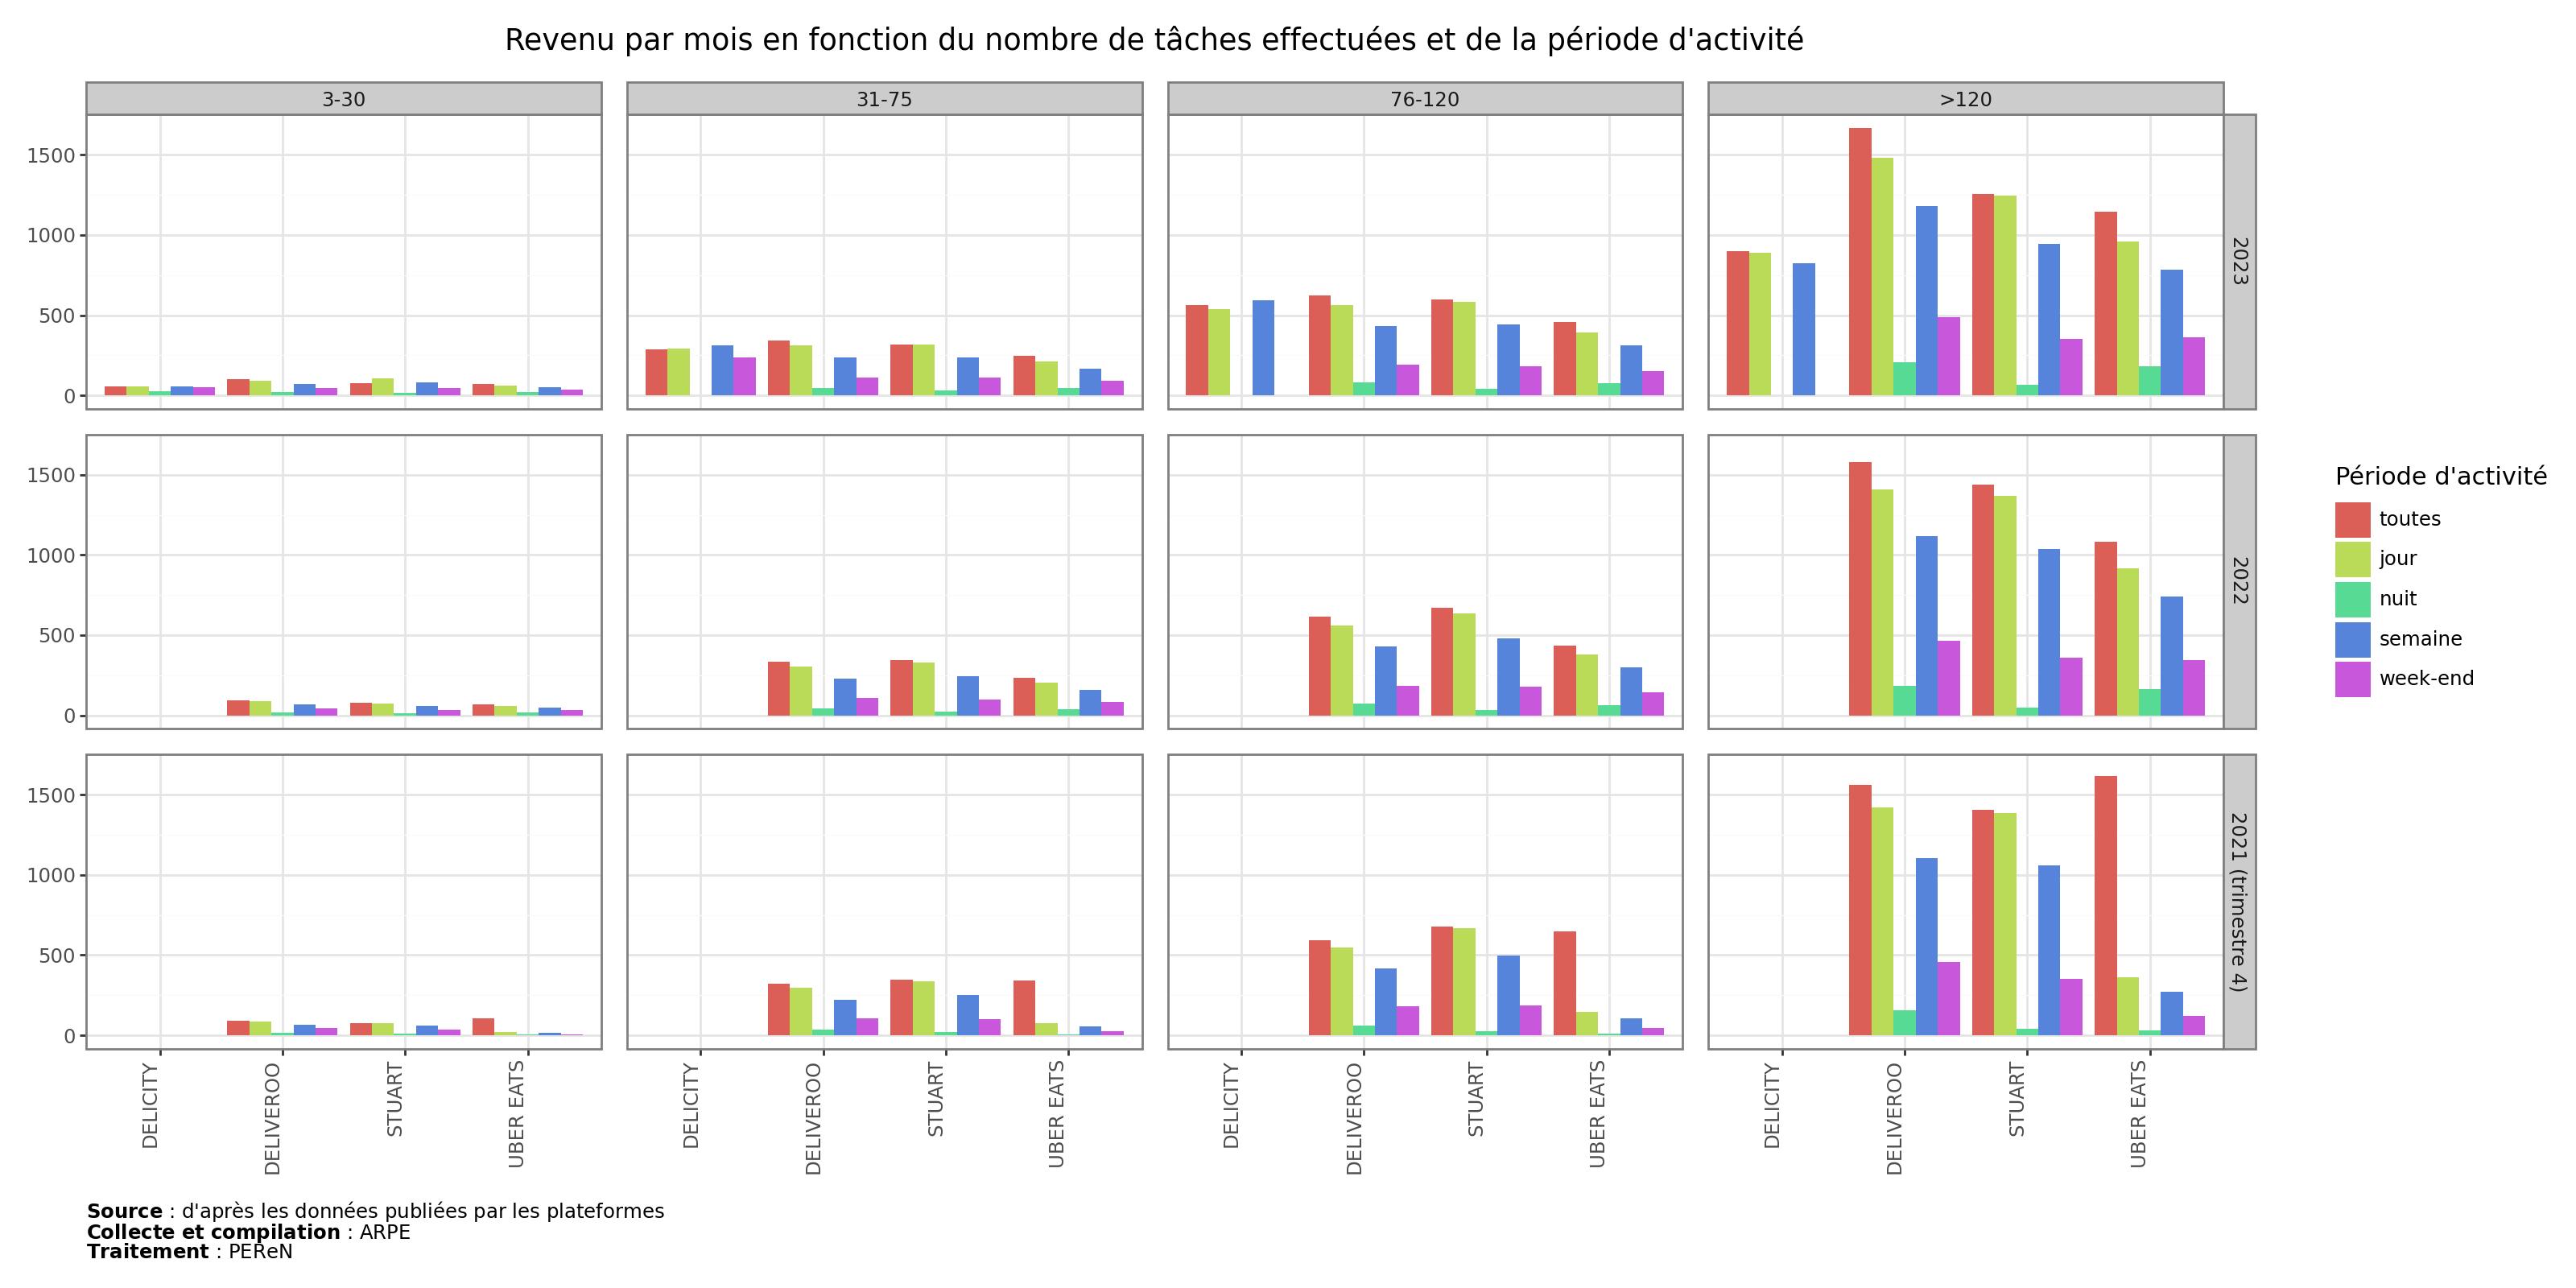

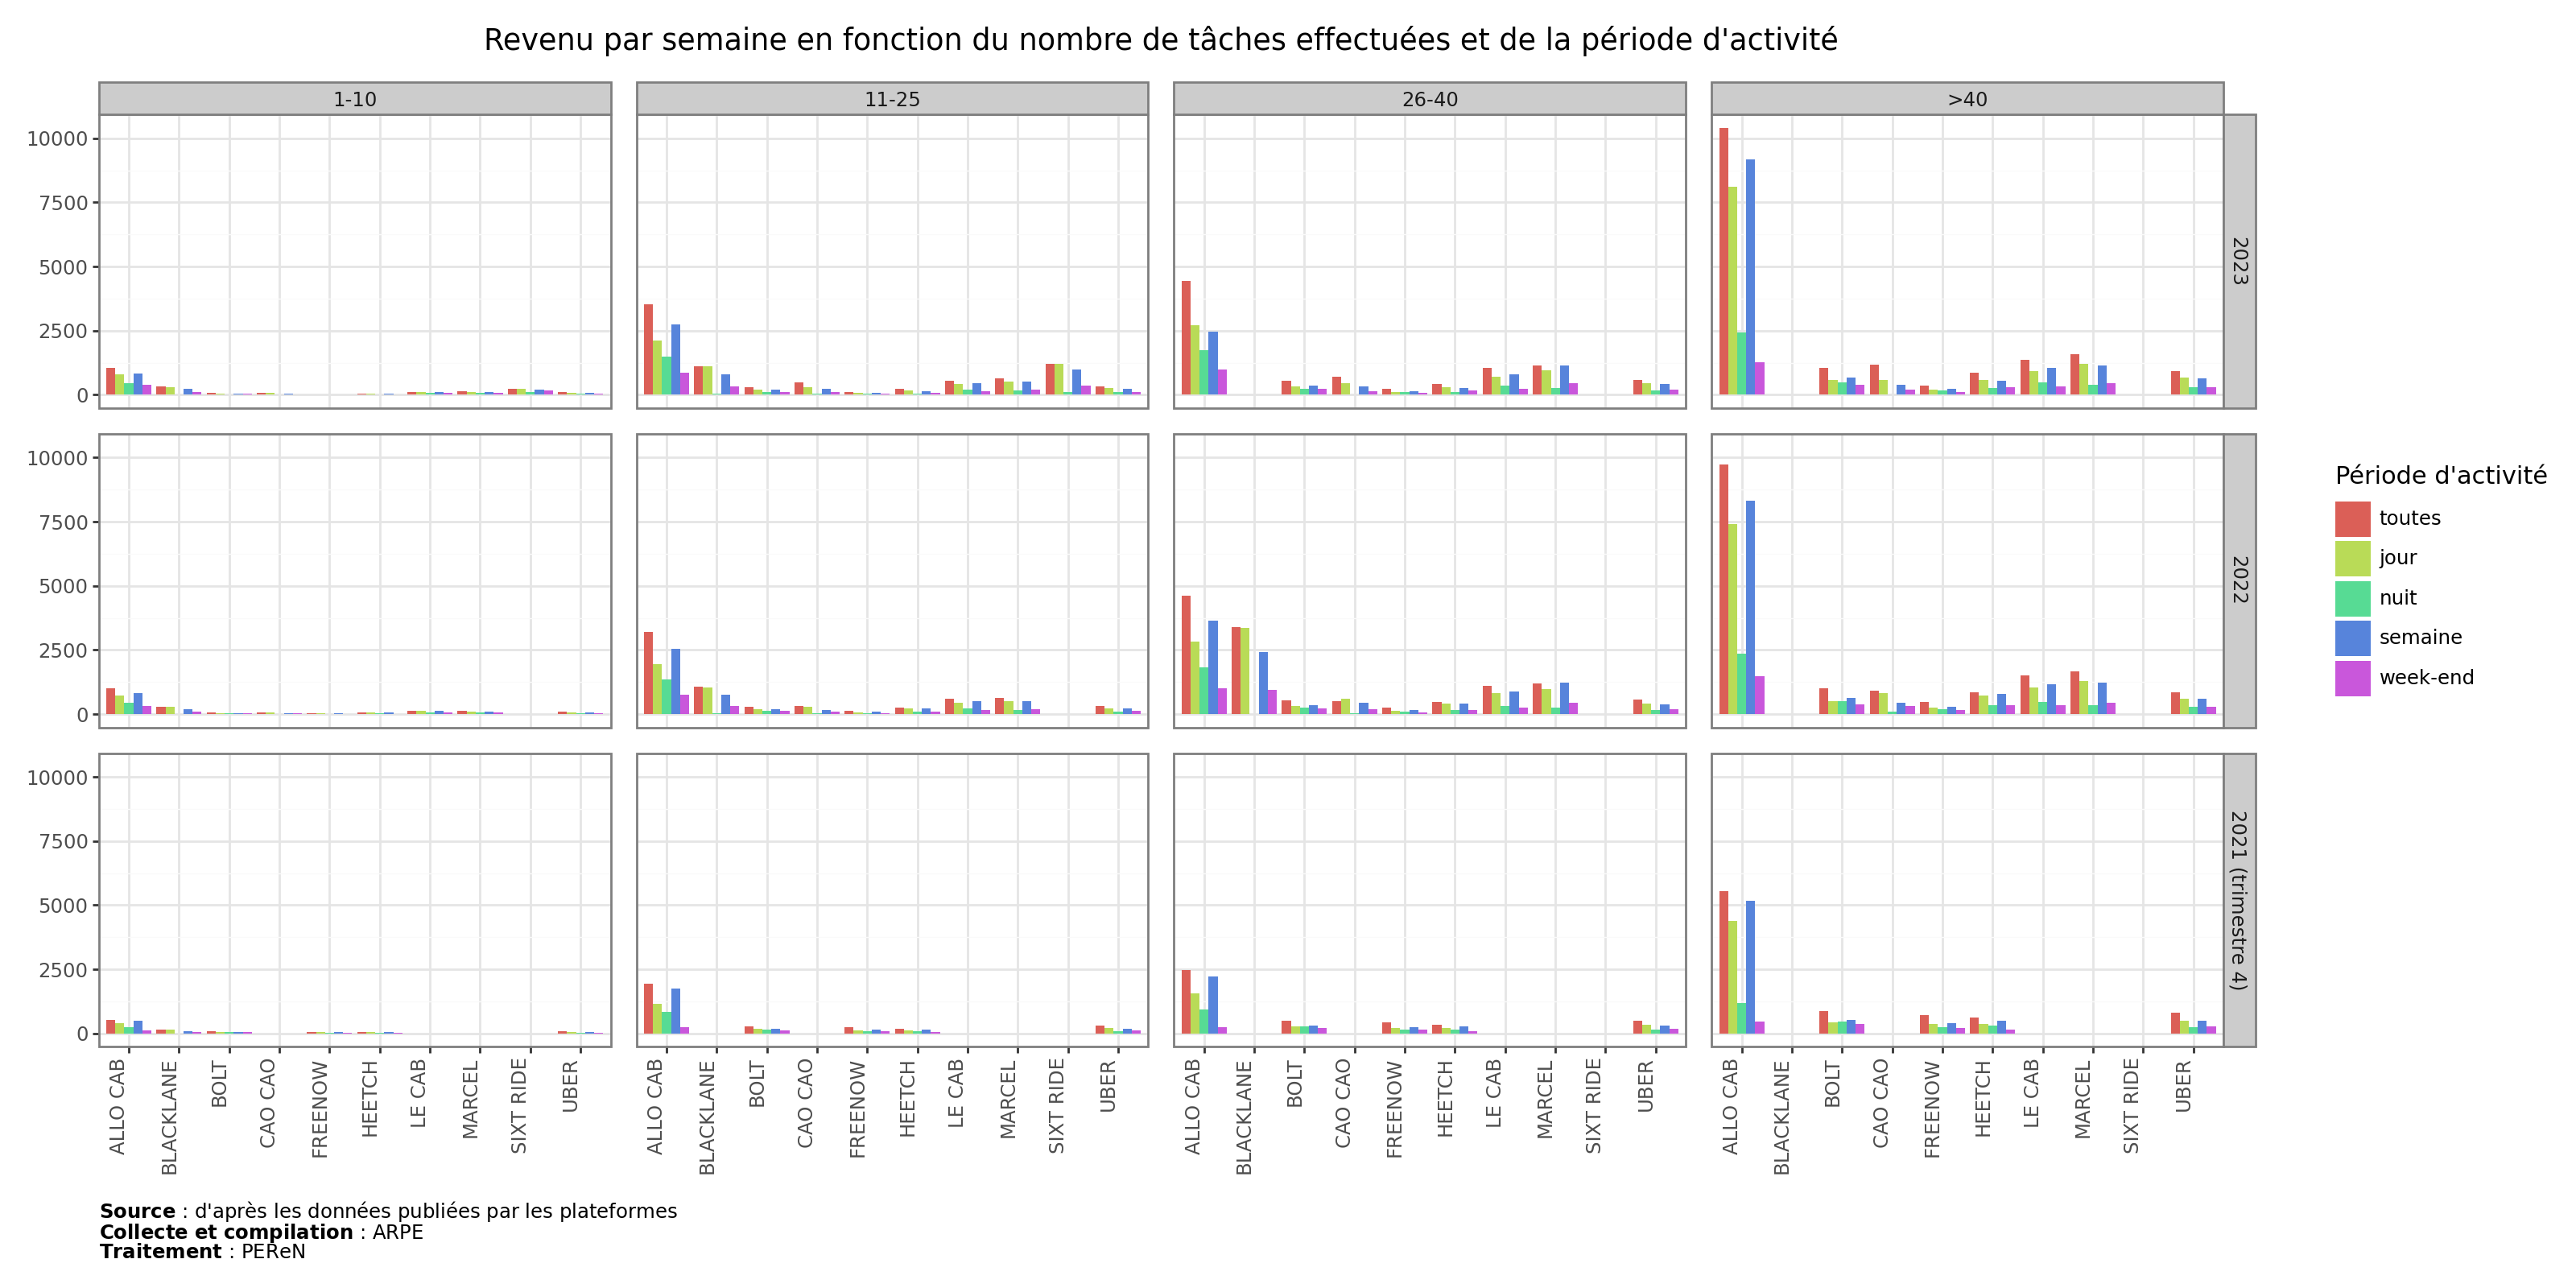

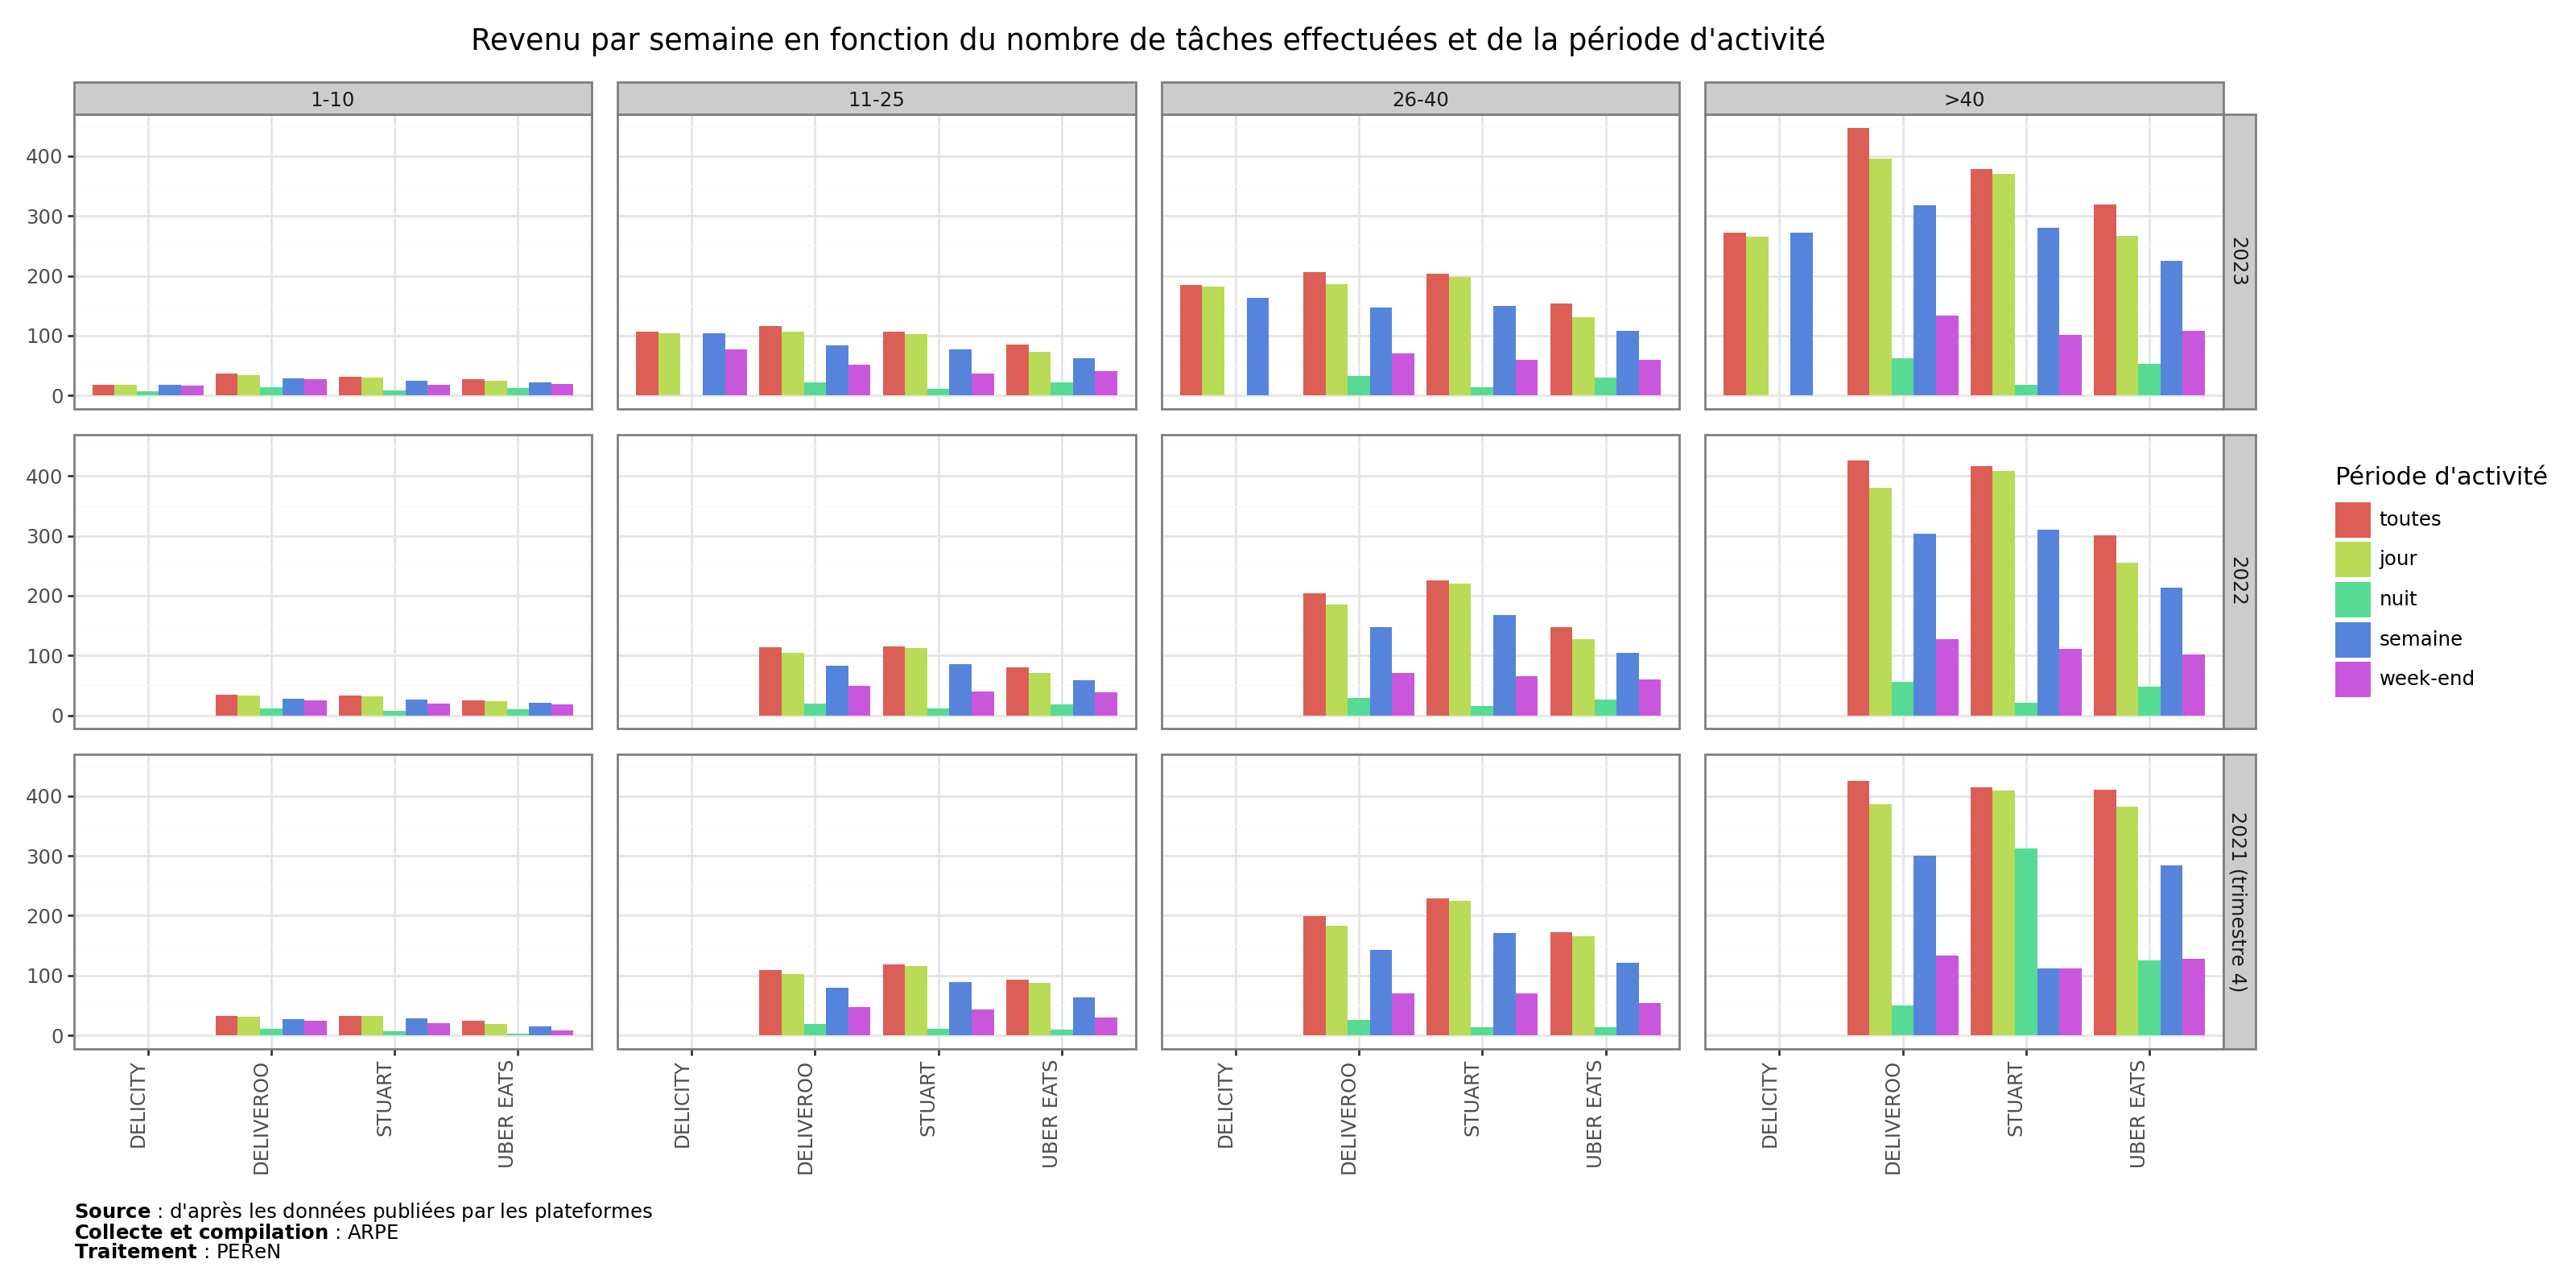

In [10]:
def graph_semaine_mois(df, duree, variable):
    # Fonction de création de graphes affichant beaucoup d'indicateurs simultanément

    # Suppression des variables non exigées par le décret et filtrage selon les variables souhaitées
    sub_df = df[(df["Durée étudiée"] == duree) & (df["Variable"] == variable)].copy()
    sub_df["Période d'activité"] = pd.Categorical(
        sub_df["Période d'activité"], periode_sort
    )
    sub_df["Année"] = pd.Categorical(sub_df["Année"], annee_sort)

    # Création du graphe

    # On ajoute l'accent à duree, et on ajoute des majuscules
    title_variable = variable.replace("duree", "durée").title()

    # Valeur par plateforme et période d'activité, à année, périodicité et nombre de tâches par période fixée
    graph = (
        p9.ggplot(sub_df)
        + p9.aes(x="Plateforme", y="Valeur", fill="Période d'activité")
        + p9.geom_col(position="dodge")
        + p9.labs(
            title=f"{title_variable} par {duree.lower()}"
            + " en fonction du nombre de tâches effectuées et de la période d'activité",
            x="",
            y="",
            caption=caption,
        )
        + p9.theme_bw()
        + p9.theme(
            figure_size=(16, 8),
            axis_text_x=p9.element_text(angle=90, hjust=1),
            plot_caption=p9.element_text(hjust=0),
        )
        # Une ligne par an, une colonne par quantité de tâche par période
        + p9.facet_grid("Année ~ Activité du travailleur")
    )
    return graph


for variable in ["duree", "revenu"]:
    for duree in ["mois", "semaine"]:
        graph_vtc = graph_semaine_mois(df_vtc, duree, variable)
        graph_livr = graph_semaine_mois(df_livr, duree, variable)
        print(graph_vtc)
        print(graph_livr)

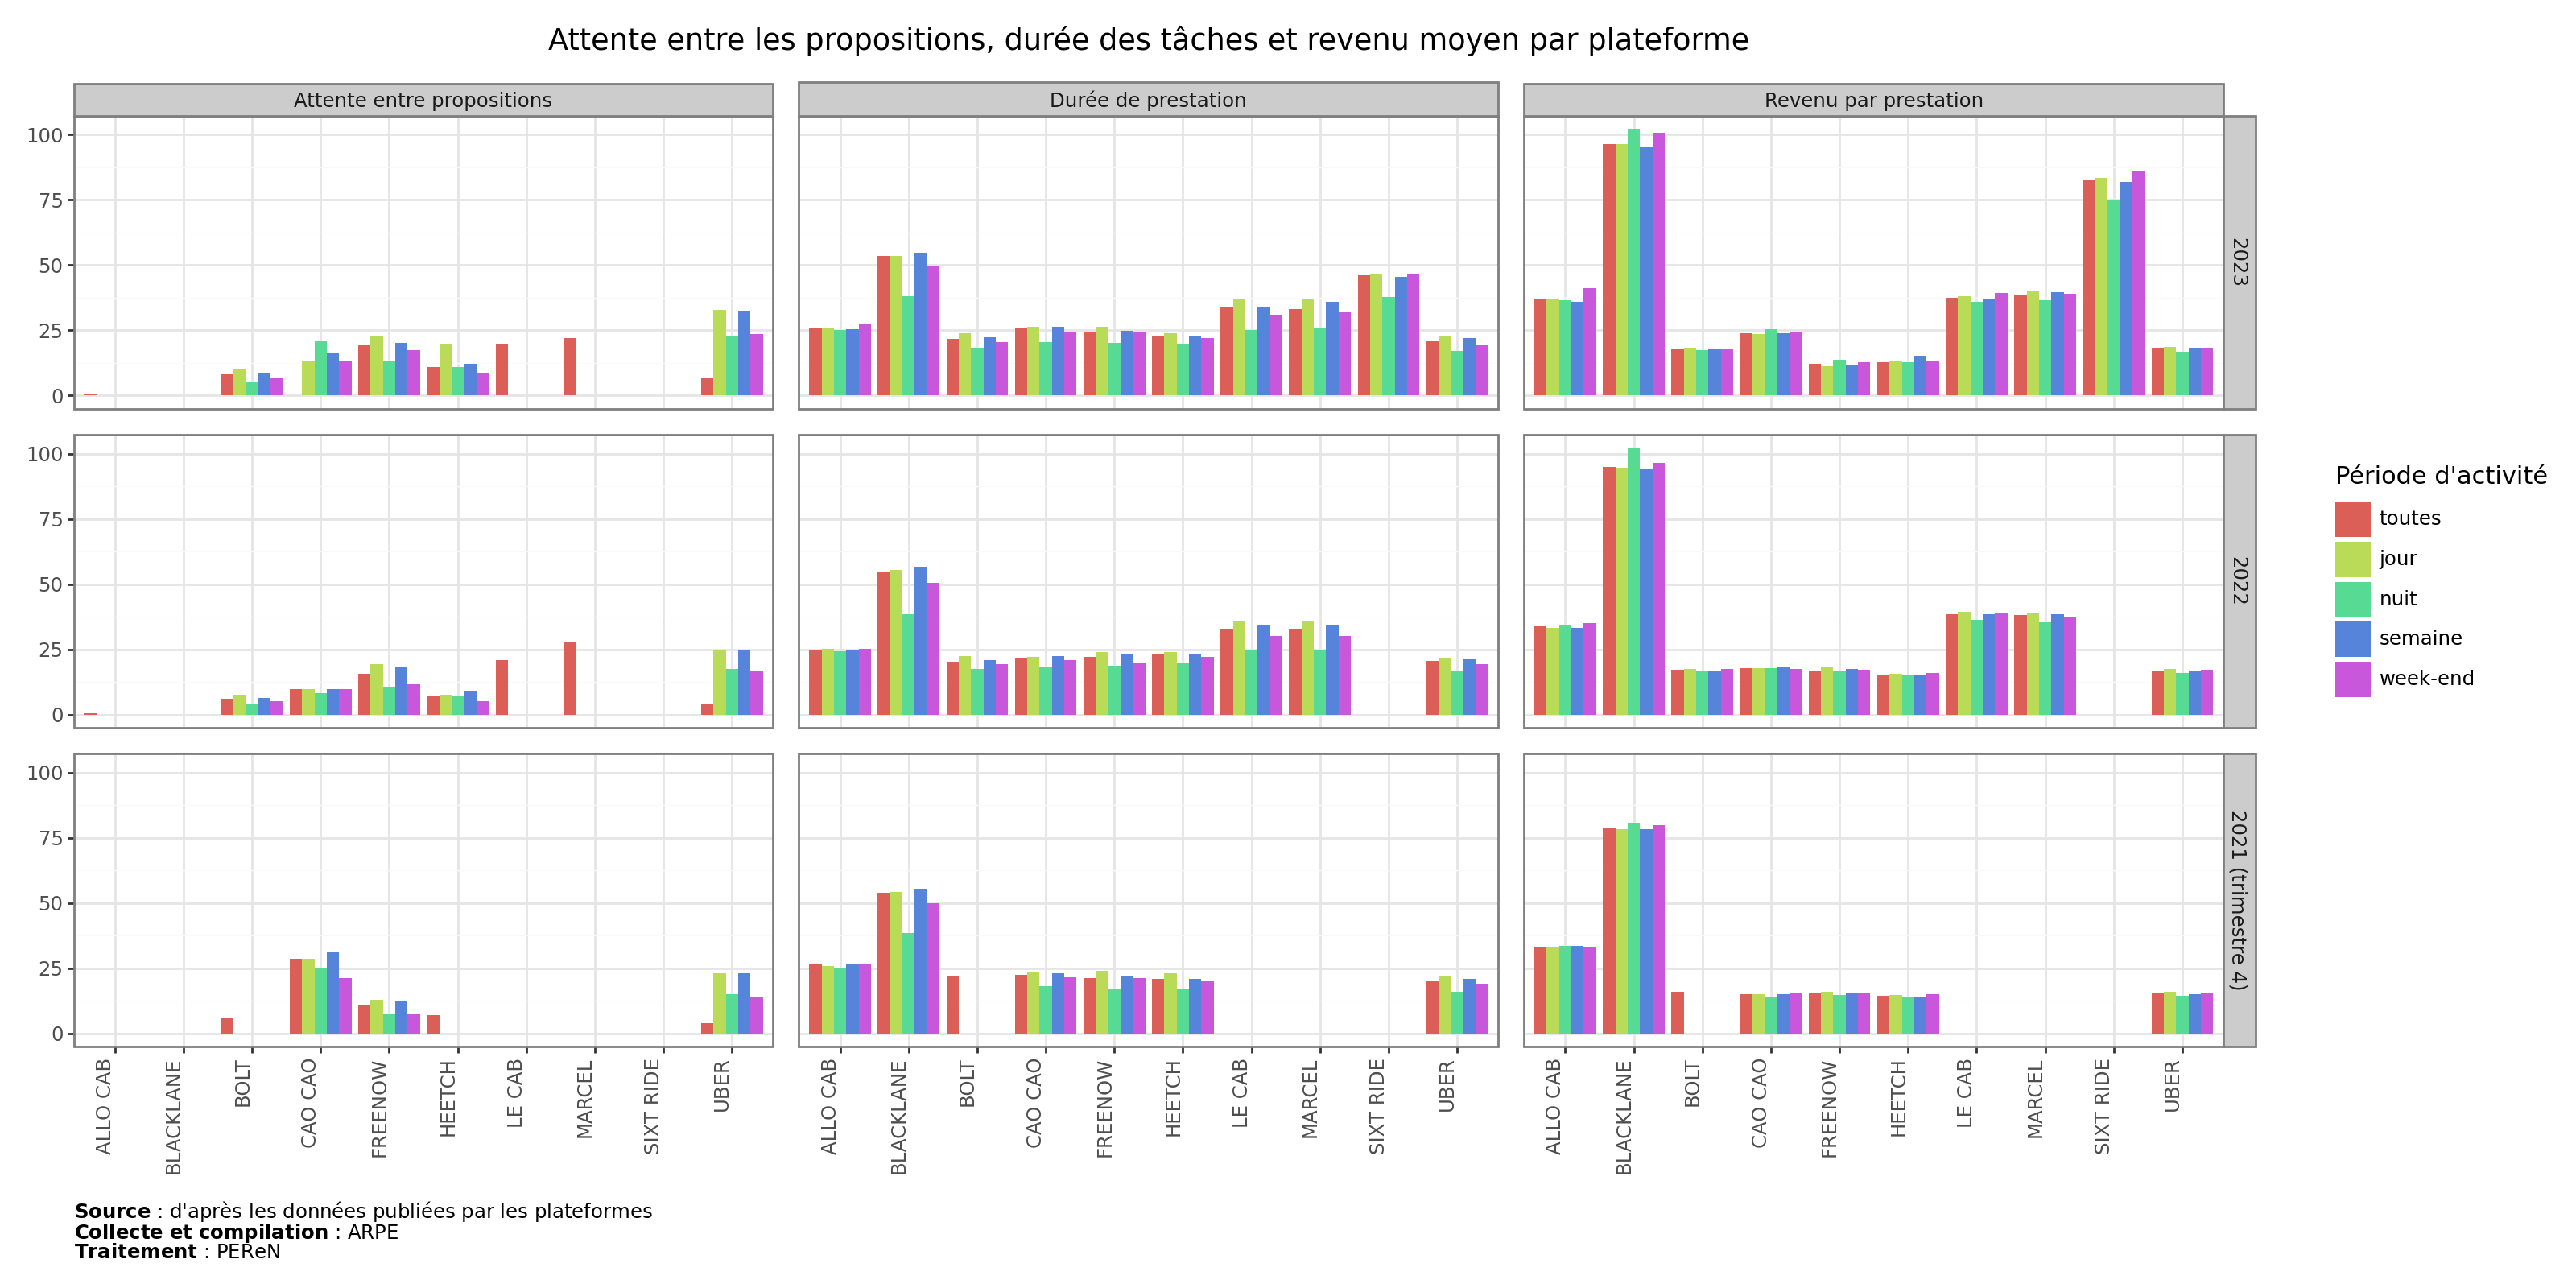

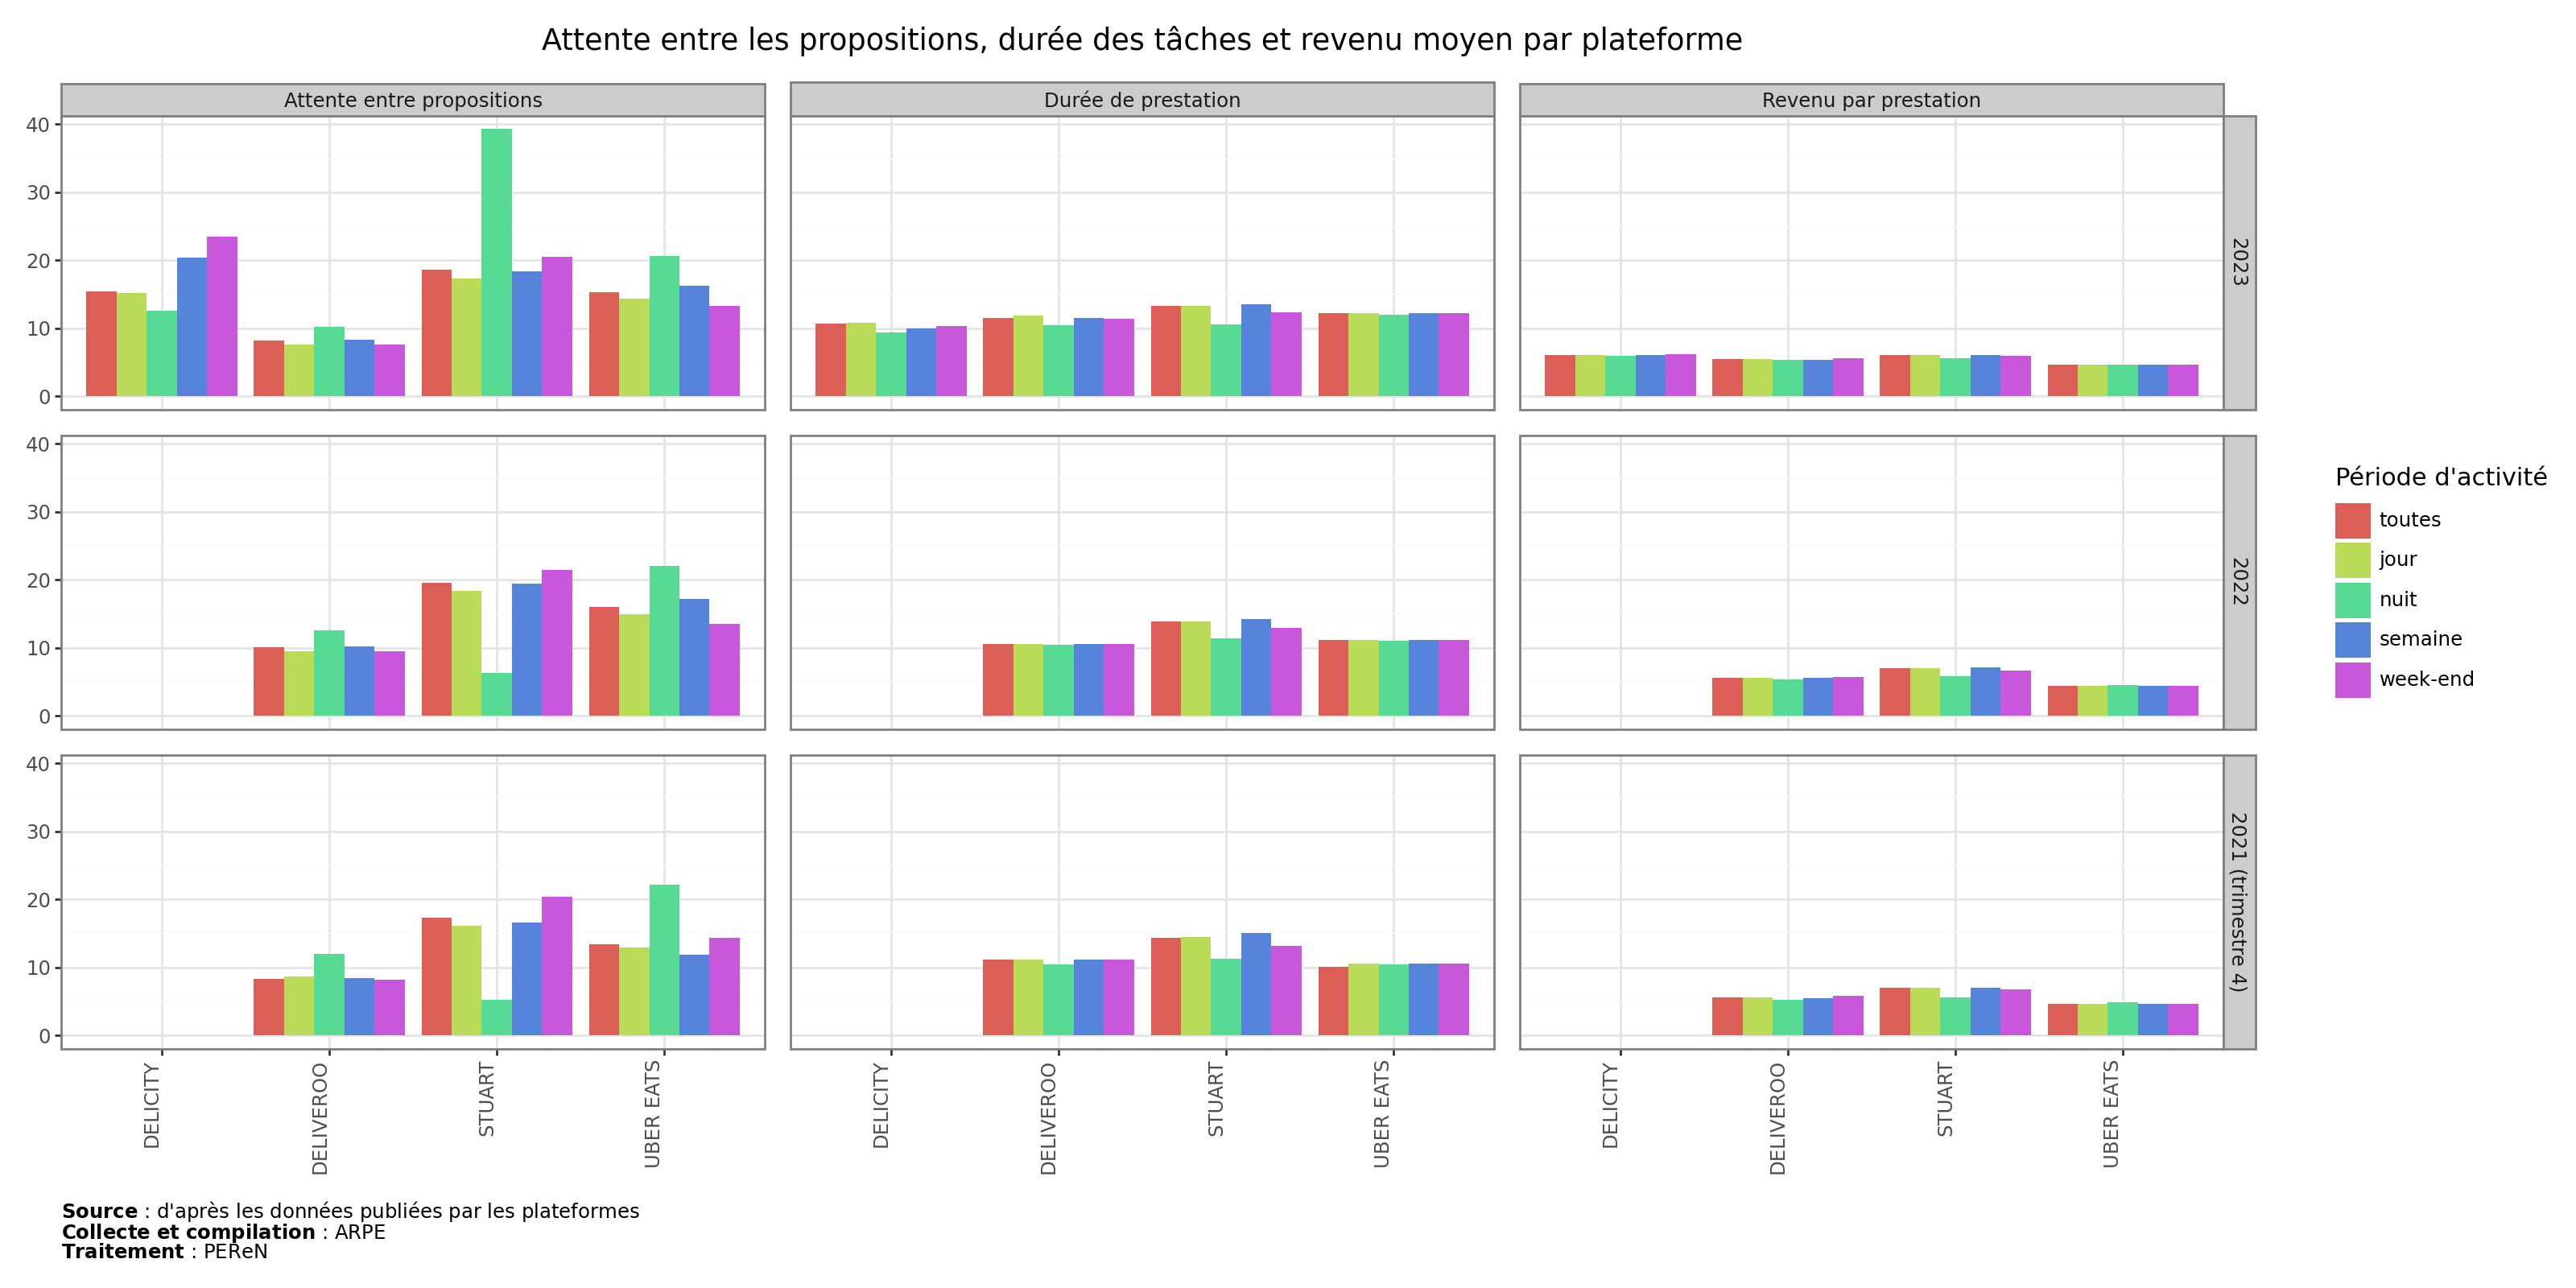

In [11]:
def graph_semaine_mois(df):
    # Fonction de création de graphes affichant beaucoup d'indicateurs simultanément

    # Suppression des variables non exigées par le décret et filtrage selon les variables souhaitées
    sub_df = df[(df["Durée étudiée"] == "prestation")].copy()
    sub_df["Période d'activité"] = pd.Categorical(
        sub_df["Période d'activité"], periode_sort
    )
    sub_df["Année"] = pd.Categorical(sub_df["Année"], annee_sort)

    # Renommage des noms de variables pour les graphiques
    sub_df["Variable"] = sub_df["Variable"].map(
        lambda x: (
            "Durée de prestation"
            if "duree" in x
            else (
                "Revenu par prestation"
                if "revenu" in x
                else "Attente entre propositions"
            )
        )
    )

    # Création du graphe
    # Valeur par plateforme et période d'activité, à année, périodicité et nombre de tâches par période fixée
    graph = (
        p9.ggplot(sub_df)
        + p9.aes(x="Plateforme", y="Valeur", fill="Période d'activité")
        + p9.geom_col(position="dodge")
        + p9.labs(
            title="Attente entre les propositions, durée des tâches et revenu moyen par plateforme",
            x="",
            y="",
            caption=caption,
        )
        + p9.theme_bw()
        + p9.theme(
            figure_size=(16, 8),
            axis_text_x=p9.element_text(angle=90, hjust=1),
            plot_caption=p9.element_text(hjust=0),
        )
        # Une ligne par an, une colonne par quantité de tâche par période
        + p9.facet_grid("Année ~ Variable")
    )
    return graph


# for variable in ["duree", "revenu", "attente-proposition"]:
graph_vtc = graph_semaine_mois(df_vtc)
graph_livr = graph_semaine_mois(df_livr)
print(graph_vtc)
print(graph_livr)